# Dataset

In [ ]:
!pip install waterfallcharts
!pip install relativeImp

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr
from relativeImp import relativeImp
import warnings
warnings.filterwarnings("ignore")
from contextlib import contextmanager
import sys, os
import waterfall_chart
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy import stats

In [ ]:
data=pd.read_csv('kc_house_data.csv')

In [ ]:
data.shape

(21613, 21)

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [ ]:
data.drop(['id','date'],axis=1,inplace=True)

In [ ]:
data.shape

(21613, 19)

In [ ]:
X=data.drop('price',axis=1)
y=data['price']

In [ ]:
var_data=X.var().reset_index()
var_data.columns=['Features','Variance']

In [ ]:
var_data[var_data['Variance']==0]

,Features,Variance


In [ ]:
sc=StandardScaler()
sc_data=sc.fit_transform(X)
sc_data=pd.DataFrame(sc_data,columns=X.columns)
sc_data=pd.concat([sc_data,y],axis=1)

In [ ]:
data['waterfront'].var()

0    21450
1      163
Name: waterfront, dtype: int64

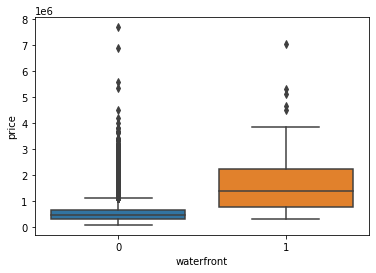

In [ ]:
sns.boxplot(data['waterfront'],data['price'])

# Model performance taking all features

In [ ]:
X=sc_data.drop('price',axis=1)
y=sc_data['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
lr=LinearRegression()
xg=XGBRegressor()
lr.fit(X_train,y_train)
xg.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
y_pred_xg=xg.predict(X_test)
r2_score_lr=r2_score(y_pred_lr,y_test)
r2_score_xg=r2_score(y_pred_xg,y_test)
  

[04:55:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print("R2 score for all features of Linear Regression is",r2_score_lr)
print("R2 score for all features of XGboost Regression is",r2_score_xg)

R2 score for all features of Linear Regression is 0.5961413354139062
R2 score for all features of XGboost Regression is 0.8370195494911019


# 1.Pearson Correlation coefficient

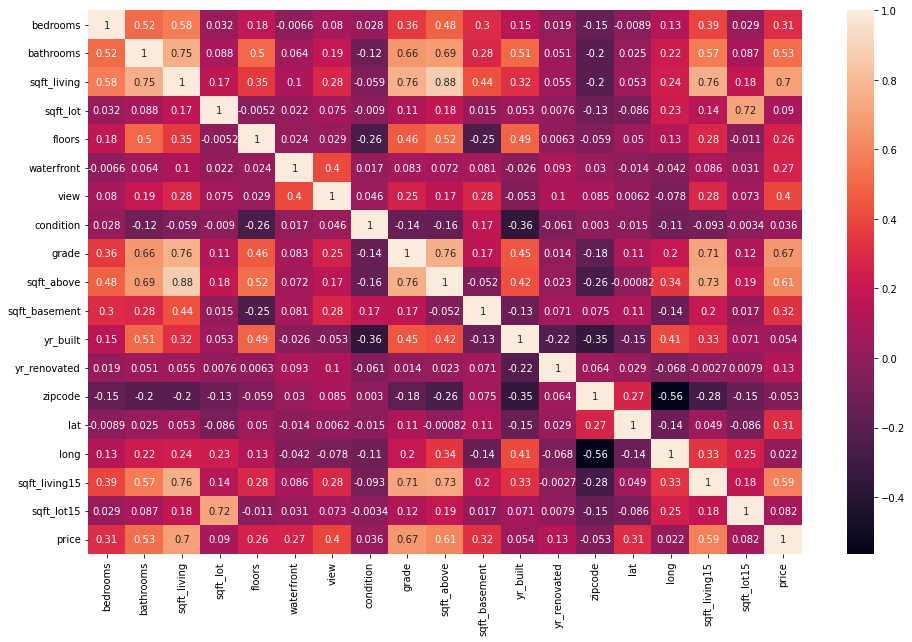

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(sc_data.corr(),annot=True)

In [ ]:
X=data.drop('price',axis=1) #Dropping dependent feature
y=data['price'] # dependent feature
X=X.select_dtypes(['number'])
#Finding correlation of all independent features
#https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

pairs_to_drop = set() #Taking only upper triangular matrix from correlation matrix
cols =X.columns #All independent feature names

for i in range(0, X.shape[1]): 
    for j in range(0, i+1):
        pairs_to_drop.add((cols[i], cols[j]))

ind_corr = X.corr(method='pearson').abs().unstack() #Correlation among all Independent features
ind_corr = ind_corr.drop(labels=pairs_to_drop).sort_values(ascending=False)

ind_corr_df=ind_corr.reset_index() #Dataframe which contains features and their correlation values
ind_corr_df.columns=['feat1','feat2','corr_value']

In [ ]:
dep_corr={} # Creating a dictionary to store values of correlation of dependent variables with independent variables
for column in X.columns: #Iterating over columns of X
  dep_corr[column]=abs(pearsonr(data['price'],data[column])[0])

In [ ]:
dep_corr

{'bathrooms': 0.5251375054139618,
 'bedrooms': 0.3083495981456382,
 'condition': 0.036361789128997554,
 'floors': 0.2567938875507184,
 'grade': 0.6674342560202371,
 'lat': 0.3070034799952187,
 'long': 0.021626241039306715,
 'sqft_above': 0.605567298356078,
 'sqft_basement': 0.323816020711984,
 'sqft_living': 0.7020350546118002,
 'sqft_living15': 0.585378903579568,
 'sqft_lot': 0.08966086058710013,
 'sqft_lot15': 0.08244715251948595,
 'view': 0.39729348829450417,
 'waterfront': 0.2663694340306022,
 'yr_built': 0.05401153149479271,
 'yr_renovated': 0.12643379344089292,
 'zipcode': 0.05320285429832562}

In [ ]:
X_train.values.reshape(-1,1)

array([[-0.86754636],
       [-0.6984789 ],
       [-0.84339386],
       ...,
       [ 0.69028953],
       [ 0.70236578],
       [-0.29996274]])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X=sc_data['waterfront']
y=sc_data['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
lr=LinearRegression()
lr.fit(X_train.values.reshape(-1,1),y_train)
y_pred=lr.predict(X_test.values.reshape(-1,1))
r2_score(y_test,y_pred)

0.02311414492957753

In [ ]:
X=sc_data['view']
y=sc_data['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
lr=LinearRegression()
lr.fit(X_train.values.reshape(-1,1),y_train)
y_pred=lr.predict(X_test.values.reshape(-1,1))
r2_score(y_test,y_pred)

0.13057371162950315

In [ ]:
sqft_above,grade,sqft_living15,bathrooms,sqft_lot,bedrooms,long,yr_built,sqft_basement,waterfront

In [ ]:
new_data=sc_data.drop(['sqft_above','grade','sqft_living15','bathrooms','sqft_lot','bedrooms','long','yr_built','sqft_basement','waterfront'],axis=1)
X=new_data.drop('price',axis=1)
y=new_data['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
lr=LinearRegression()
xg=XGBRegressor()
lr.fit(X_train,y_train)
xg.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
y_pred_xg=xg.predict(X_test)
r2_score_lr=r2_score(y_pred_lr,y_test)
r2_score_xg=r2_score(y_pred_xg,y_test)
print("R2 score for all features of Linear Regression is",r2_score_lr)
print("R2 score for all features of XGboost Regression is",r2_score_xg)

[05:20:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score for all features of Linear Regression is 0.4283259326472838
R2 score for all features of XGboost Regression is 0.7653748164932438


In [ ]:
from xgboost import XGBRegressor
X=sc_data.drop(['sqft_living','price'],axis=1)
y=sc_data['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
lr=XGBRegressor()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

[05:28:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8659751185390209

In [ ]:
X=sc_data.drop(['sqft_above','price'],axis=1)
y=sc_data['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
lr=XGBRegressor()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

[05:28:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8685243962042175

## Threshold 0.4

In [ ]:
def remove_correlated(data,dependent,threshold):
  """This function is used to find feature importance of independent variables
  data: you need to give the whole dataset in pandas dataframe
  dependent: Mention the dependent feature name in string format.
  Returns:
  removed features names
  """
  X=data.drop(dependent,axis=1) #Dropping dependent feature
  y=data[dependent] # dependent feature
  X=X.select_dtypes(['number'])
#Finding correlation of all independent features
#https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

  pairs_to_drop = set() #Taking only upper triangular matrix from correlation matrix
  cols =X.columns #All independent feature names

  for i in range(0, X.shape[1]): 
      for j in range(0, i+1):
          pairs_to_drop.add((cols[i], cols[j]))

  ind_corr = X.corr(method='pearson').abs().unstack() #Correlation among all Independent features
  ind_corr = ind_corr.drop(labels=pairs_to_drop).sort_values(ascending=False)

  ind_corr_df=ind_corr.reset_index() #Dataframe which contains features and their correlation values
  ind_corr_df.columns=['feat1','feat2','corr_value']

  #Finding Correlation of dependent variable with independent variables
  dep_corr={} # Creating a dictionary to store values of correlation of dependent variables with independent variables
  for column in X.columns: #Iterating over columns of X
    dep_corr[column]=abs(pearsonr(data[dependent],data[column])[0])

  high_corr=ind_corr_df[ind_corr_df['corr_value']>threshold] #Taking all the features which are having correlation>0.4

  remove_feat=[] #List to store to highly correlated features which we will be removing.

  for i in range(high_corr.shape[0]):
    feat1=high_corr.iloc[i]['feat1']
    feat2=high_corr.iloc[i]['feat2']

    if feat1 not in remove_feat and feat2 not in remove_feat:
      dep_feat1_corr=dep_corr[feat1]  #Feature1 correlation with dependent variable
      dep_feat2_corr=dep_corr[feat2]  #Feature2 correlation with dependent variable

      if dep_feat1_corr<dep_feat2_corr: #Checking which feature is having low correlation with dependent variable
        remove_feat.append(feat1)
      else:
        remove_feat.append(feat2)
  return remove_feat 

In [ ]:
rem_feat=remove_correlated(data,'price',0.4)
rem_feat

['sqft_above',
 'grade',
 'sqft_living15',
 'bathrooms',
 'sqft_lot15',
 'bedrooms',
 'long',
 'yr_built',
 'sqft_basement',
 'waterfront']

10 features are removed

In [ ]:
new_data=sc_data.drop(rem_feat,axis=1)
X=new_data.drop('price',axis=1)
y=new_data['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
lr=LinearRegression()
xg=XGBRegressor()
lr.fit(X_train,y_train)
xg.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
y_pred_xg=xg.predict(X_test)
r2_score_lr=r2_score(y_pred_lr,y_test)
r2_score_xg=r2_score(y_pred_xg,y_test)
print("R2 score for all features of Linear Regression is",r2_score_lr)
print("R2 score for all features of XGboost Regression is",r2_score_xg)

[10:44:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score for all features of Linear Regression is 0.42756350702860324
R2 score for all features of XGboost Regression is 0.7676410957754113


## Threshold 0.6

In [ ]:
rem_feat=remove_correlated(data,'price',0.6)
rem_feat

['sqft_above', 'grade', 'sqft_living15', 'bathrooms', 'sqft_lot15']

In [ ]:
new_data=sc_data.drop(rem_feat,axis=1)
X=new_data.drop('price',axis=1)
y=new_data['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
lr=LinearRegression()
xg=XGBRegressor()
lr.fit(X_train,y_train)
xg.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
y_pred_xg=xg.predict(X_test)
r2_score_lr=r2_score(y_pred_lr,y_test)
r2_score_xg=r2_score(y_pred_xg,y_test)
print("R2 score for all features of Linear Regression is",r2_score_lr)
print("R2 score for all features of XGboost Regression is",r2_score_xg)

[05:28:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score for all features of Linear Regression is 0.4987939002273474
R2 score for all features of XGboost Regression is 0.774938685100738


# Threshold 0.7

In [ ]:
rem_feat=remove_correlated(data,'price',0.7)
rem_feat

['sqft_above', 'grade', 'sqft_living15', 'bathrooms', 'sqft_lot15']

In [ ]:
new_data=sc_data.drop(rem_feat,axis=1)
X=new_data.drop('price',axis=1)
y=new_data['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
lr=LinearRegression()
xg=XGBRegressor()
lr.fit(X_train,y_train)
xg.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
y_pred_xg=xg.predict(X_test)
r2_score_lr=r2_score(y_pred_lr,y_test)
r2_score_xg=r2_score(y_pred_xg,y_test)
print("R2 score for all features of Linear Regression is",r2_score_lr)
print("R2 score for all features of XGboost Regression is",r2_score_xg)

[05:30:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score for all features of Linear Regression is 0.4987939002273474
R2 score for all features of XGboost Regression is 0.774938685100738


# Threshold 0.75

In [ ]:
rem_feat=remove_correlated(data,'price',0.75)
rem_feat

['sqft_above', 'grade', 'sqft_living15', 'bathrooms']

In [ ]:
new_data=sc_data.drop(rem_feat,axis=1)
X=new_data.drop('price',axis=1)
y=new_data['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
lr=LinearRegression()
xg=XGBRegressor()
lr.fit(X_train,y_train)
xg.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
y_pred_xg=xg.predict(X_test)
r2_score_lr=r2_score(y_pred_lr,y_test)
r2_score_xg=r2_score(y_pred_xg,y_test)
print("R2 score for all features of Linear Regression is",r2_score_lr)
print("R2 score for all features of XGboost Regression is",r2_score_xg)

[05:32:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score for all features of Linear Regression is 0.4991048630598254
R2 score for all features of XGboost Regression is 0.7751362161912304


In [ ]:
new_data=sc_data.drop(['sqft_above', 'sqft_living', 'sqft_living15', 'bathrooms'],axis=1)
X=new_data.drop('price',axis=1)
y=new_data['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
lr=LinearRegression()
xg=XGBRegressor()
lr.fit(X_train,y_train)
xg.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
y_pred_xg=xg.predict(X_test)
r2_score_lr=r2_score(y_pred_lr,y_test)
r2_score_xg=r2_score(y_pred_xg,y_test)
print("R2 score for all features of Linear Regression is",r2_score_lr)
print("R2 score for all features of XGboost Regression is",r2_score_xg)

# Threshold 0.8

In [ ]:
rem_feat=remove_correlated(data,'price',0.8)
rem_feat

['sqft_above']

In [ ]:
def remove_correlated(data,dependent,threshold,complusory_feat=[]):
  """This function is used to find feature importance of independent variables
  data: you need to give the whole dataset in pandas dataframe
  complusory_feat: List containing complusory feature names
  dependent: Mention the dependent feature name in string format.
  Returns:
  removed features names
  """
  X=data.drop(dependent,axis=1) #Dropping dependent feature
  y=data[dependent] # dependent feature
  #Dropping Complusory features , so that we are not calculating correlation about those features
  X=X.select_dtypes(['number'])
#Finding correlation of all independent features
#https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

  pairs_to_drop = set() #Taking only upper triangular matrix from correlation matrix
  cols =X.columns #All independent feature names

  for i in range(0, X.shape[1]): 
      for j in range(0, i+1):
          pairs_to_drop.add((cols[i], cols[j]))

  ind_corr = X.corr(method='pearson').abs().unstack() #Correlation among all Independent features
  ind_corr = ind_corr.drop(labels=pairs_to_drop).sort_values(ascending=False)

  ind_corr_df=ind_corr.reset_index() #Dataframe which contains features and their correlation values
  ind_corr_df.columns=['feat1','feat2','corr_value']

  #Finding Correlation of dependent variable with independent variables
  dep_corr={} # Creating a dictionary to store values of correlation of dependent variables with independent variables
  for column in X.columns: #Iterating over columns of X
    dep_corr[column]=abs(pearsonr(data[dependent],data[column])[0])

  high_corr=ind_corr_df[ind_corr_df['corr_value']>threshold] #Taking all the features which are having correlation>0.4

  remove_feat=[] #List to store to highly correlated features which we will be removing.

  for i in range(high_corr.shape[0]):
    feat1=high_corr.iloc[i]['feat1']
    feat2=high_corr.iloc[i]['feat2']

    if feat1 not in remove_feat and feat2 not in remove_feat:
      if feat1 not in complusory_feat and feat2 not in complusory_feat:
        dep_feat1_corr=dep_corr[feat1]  #Feature1 correlation with dependent variable
        dep_feat2_corr=dep_corr[feat2]  #Feature2 correlation with dependent variable

        if dep_feat1_corr<dep_feat2_corr: #Checking which feature is having low correlation with dependent variable
          remove_feat.append(feat1)
        else:
          remove_feat.append(feat2)
      elif feat1 in complusory_feat and feat2 not in complusory_feat:
        remove_feat.append(feat2)
      elif feat1 not in complusory_feat and feat2 in complusory_feat:
        remove_feat.append(feat1)
      elif feat1 in complusory_feat and feate2 in complusory_feat:
        pass
  return remove_feat

In [ ]:
rem_feat=remove_correlated(data,'price',0.8,['sqft_above'])
rem_feat

['sqft_living']

In [ ]:
new_data=sc_data.drop(rem_feat,axis=1)
X=new_data.drop('price',axis=1)
y=new_data['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
lr=LinearRegression()
xg=XGBRegressor()
lr.fit(X_train,y_train)
xg.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
y_pred_xg=xg.predict(X_test)
r2_score_lr=r2_score(y_pred_lr,y_test)
r2_score_xg=r2_score(y_pred_xg,y_test)
print("R2 score for all features of Linear Regression is",r2_score_lr)
print("R2 score for all features of XGboost Regression is",r2_score_xg)

[10:51:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score for all features of Linear Regression is 0.5961413354139065
R2 score for all features of XGboost Regression is 0.8383677835668766


# Threshold 0.85

In [ ]:
rem_feat=remove_correlated(data,'price',0.85)
rem_feat

['sqft_above']

# Threshold 0.9

In [ ]:
rem_feat=remove_correlated(data,'price',0.9)
rem_feat

[]

## Backward Elimination Method

In [ ]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
X=data.drop('price',axis=1)
y=data['price']

In [ ]:
from patsy import ModelDesc, Term, LookupFactor

response_terms = [Term([LookupFactor('price')])]

# ...then add another term for each candidate
model_terms = [Term([LookupFactor(c)]) for c in X.columns]
model_desc = ModelDesc(response_terms, model_terms)

In [ ]:
from statsmodels.formula.api import ols
from patsy import ModelDesc
from patsy.builtins import Q

LRmodel = ols(model_desc,
              data=data).fit()

print(LRmodel.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                          1.211e+04
Date:                Tue, 15 Mar 2022   Prob (F-statistic):                        0.00
Time:                        04:52:23   Log-Likelihood:                     -2.9461e+05
No. Observations:               21613   AIC:                                  5.892e+05
Df Residuals:                   21596   BIC:                                  5.894e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:
response_terms = [Term([LookupFactor('price')])]
model_terms = [Term([LookupFactor(c)]) for c in X.drop(['floors'],axis=1).columns]
model_desc = ModelDesc(response_terms, model_terms)
LRmodel = ols(model_desc,
              data=data).fit()

print(LRmodel.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                          1.287e+04
Date:                Tue, 15 Mar 2022   Prob (F-statistic):                        0.00
Time:                        04:55:36   Log-Likelihood:                     -2.9461e+05
No. Observations:               21613   AIC:                                  5.892e+05
Df Residuals:                   21597   BIC:                                  5.894e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

# Feature Importance Plot

In [ ]:
def feature_importance(data,dependent):
  """This function will calculate Relative Feature importance
  of Independent features
  data: Data should be in pandas Dataframe
  dependent: dependent variable name should be passed in string format
  Returns dictionary containing features names with their Relative feature importance.
   """
  col=list(data.drop(dependent,axis=1).columns)
  df_results = relativeImp(data, outcomeName =dependent, driverNames =col )
  df_results['normRelaImpt']=df_results['normRelaImpt'].round(1) #rounding Values upto 1 decimal Digit
  df_results=df_results[df_results['normRelaImpt']!=0] 
  features=list(df_results['driver'])
  importance=list(df_results['normRelaImpt'])
  feat_imp_dict=dict(zip(features,importance))
  feat_imp_dict=dict(sorted(feat_imp_dict.items(),key= lambda x:x[1],reverse=True)) #Sorting dictionary by their values
  return feat_imp_dict

In [ ]:
def feat_imp_plot(feat_imp_dict):
  """This function is used to plot Relative Feature Importances.
  feat_imp_dict: dictionary contains Features as key and Relative importance as values.
  Returns Feature Importance plot
  """
  plt.rcParams["figure.figsize"] = (10,6)
  waterfall_chart.plot(list(feat_imp_dict.keys()),list(feat_imp_dict.values()),rotation_value=90,
                      formatting="{:,.1f}%",blue_color='slateblue',green_color='lime',
                      red_color='red',net_label='Net')
  plt.title('Relative Feature Importance ', fontsize=40)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.xlabel("Features",fontsize=20)
  plt.ylabel('Relative Feature Importance', fontsize=20)
  plt.show()

In [ ]:
feat_imp_plot(feat_dict)

<IPython.core.display.Javascript object>

In [ ]:
rem_feat=remove_correlated(data,'price',0.8)
rem_feat

['sqft_above']

In [ ]:
rem_feat=remove_correlated(data,'price',0.8)
new_data=data.drop(rem_feat,axis=1)
feat_dict=feature_importance(new_data,'price')

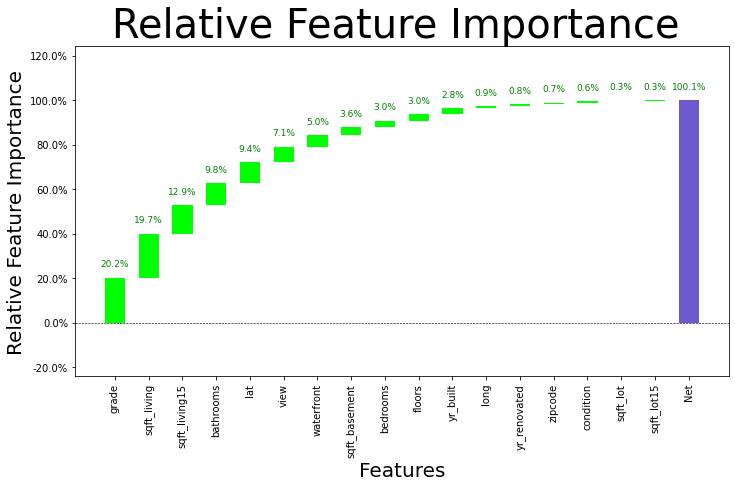

In [ ]:
feat_imp_plot(feat_dict)

In [ ]:
cols=[ 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view',  'grade',
       'sqft_basement', 'yr_built','lat', 
       'sqft_living15']

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(sc_data[cols],y)

[11:30:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
!pip install shap
import shap
shap.initjs()

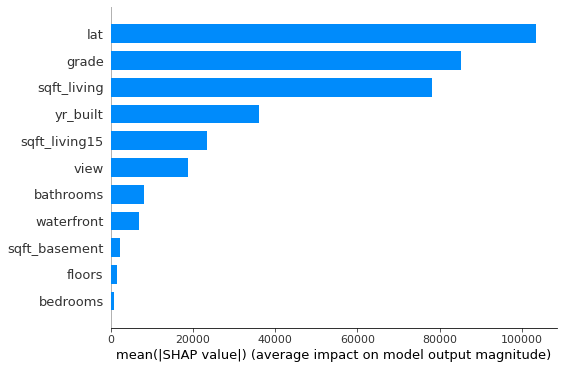

In [ ]:

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(sc_data[cols])
shap.summary_plot(shap_values, features=sc_data[cols], feature_names=sc_data[cols].columns, plot_type='bar')

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(sc_data[cols],y)

LinearRegression()

In [ ]:
def plot_feature_importance(features,feat_imp):
  """This function is used to plot Feature Importance plot"""
  dictionary=dict(zip(features,feat_imp))
  dictionary=dict(sorted(dictionary.items(),key=lambda item:item[1],reverse=True))
  plt.figure(figsize=(16,10))
  sns.barplot(list(dictionary.values()),list(dictionary.keys()))

[08:45:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


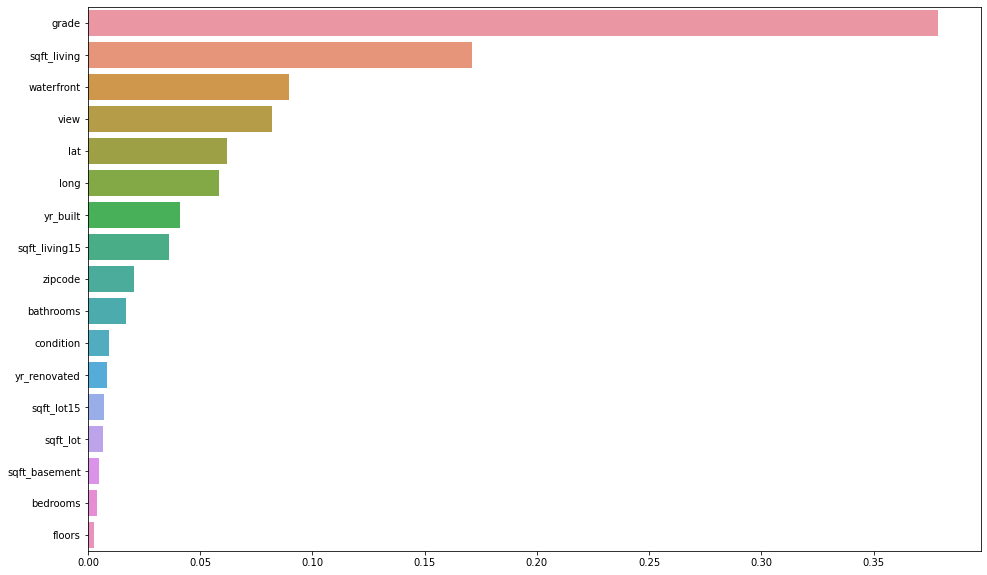

In [ ]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(data.drop(['price','sqft_above'],axis=1),data['price'])
plot_feature_importance(model.get_booster().feature_names,model.feature_importances_)

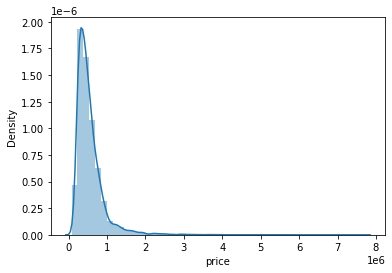

In [ ]:
sns.distplot(data['price'])

In [ ]:
#Finding Correlation of dependent variable with independent variables
dep_corr={} # Creating a dictionary to store values of correlation of dependent variables with independent variables
for column in cols: #Iterating over columns of X
  dep_corr[column]=pearsonr(data['price'],data[column])[0]
dep_corr=dict(sorted(dep_corr.items(),key=lambda item:item[1],reverse=True))

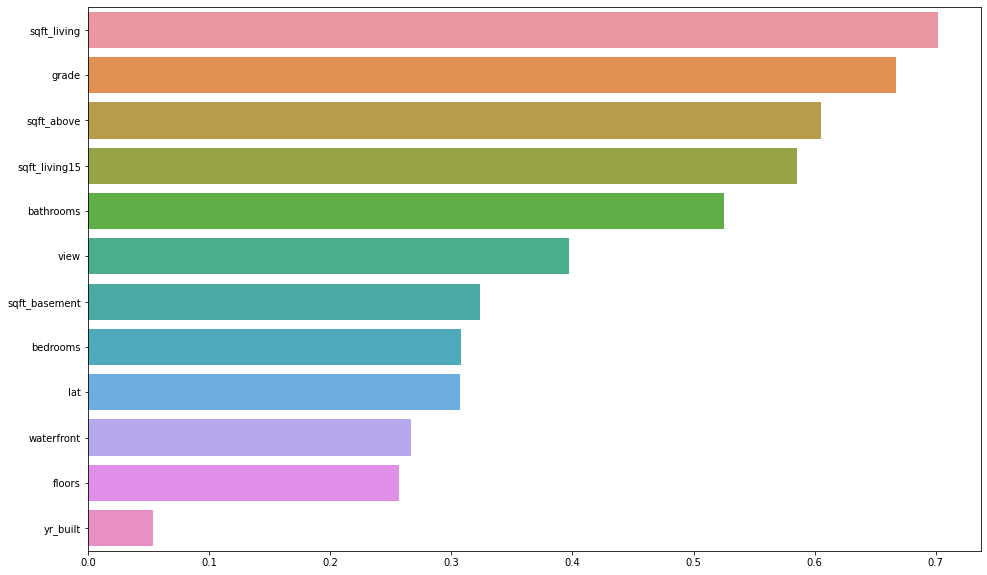

In [ ]:
plot_feature_importance(dep_corr.keys(),dep_corr.values())

In [ ]:
!pip install Kruskals

In [ ]:
data1=data.drop('sqft_above',axis=1)

In [ ]:
import Kruskals
kruskal_data=Kruskals.Kruskals.from_pandas_df(data1, data1.drop('price',axis=1).columns, 'price').driver_score_to_series(directional=True).reset_index()

In [ ]:
kruskal_data['score']=kruskal_data['score'].apply(lambda x:x*100).round(1)


In [ ]:
dep_corr

{'bathrooms': 0.5251375054139618,
 'bedrooms': 0.3083495981456382,
 'condition': 0.036361789128997554,
 'floors': 0.2567938875507184,
 'grade': 0.6674342560202371,
 'lat': 0.3070034799952187,
 'long': 0.021626241039306715,
 'sqft_above': 0.605567298356078,
 'sqft_basement': 0.323816020711984,
 'sqft_living': 0.7020350546118002,
 'sqft_living15': 0.585378903579568,
 'sqft_lot': 0.08966086058710013,
 'sqft_lot15': 0.08244715251948595,
 'view': 0.39729348829450417,
 'waterfront': 0.2663694340306022,
 'yr_built': 0.05401153149479271,
 'yr_renovated': 0.12643379344089292,
 'zipcode': -0.05320285429832562}

In [ ]:
np.linspace(0,100,10)

array([  0.        ,  11.11111111,  22.22222222,  33.33333333,
        44.44444444,  55.55555556,  66.66666667,  77.77777778,
        88.88888889, 100.        ])

In [ ]:
#Finding Correlation of dependent variable with independent variables
dep_corr={} # Creating a dictionary to store values of correlation of dependent variables with independent variables
for column in non_corr_col: #Iterating over columns of X
  dep_corr[column]=pearsonr(data['price'],data[column])[0]
dep_corr=dict(sorted(dep_corr.items(),key=lambda item:item[1],reverse=True))

In [ ]:
dep_corr

{'bathrooms': 0.5251375054139618,
 'bedrooms': 0.3083495981456382,
 'condition': 0.036361789128997554,
 'floors': 0.2567938875507184,
 'grade': 0.6674342560202371,
 'lat': 0.3070034799952187,
 'long': 0.021626241039306715,
 'sqft_basement': 0.323816020711984,
 'sqft_living': 0.7020350546118002,
 'sqft_living15': 0.585378903579568,
 'sqft_lot': 0.08966086058710013,
 'sqft_lot15': 0.08244715251948595,
 'view': 0.39729348829450417,
 'waterfront': 0.2663694340306022,
 'yr_built': 0.05401153149479271,
 'yr_renovated': 0.12643379344089292,
 'zipcode': -0.05320285429832562}

In [ ]:
imp_values=list(feat_dict.values())

In [ ]:
imp_feat=list(feat_dict.keys())

In [ ]:
quadrant1=[] #positive relation and high importance
quadrant2=[] #negative relation and high importance
quadrant3=[] #negative relation and low importance
quadrant4=[] #positive relation and low importance
dict_quad={}
for i in range(len(imp_feat)):
  if dep_corr[imp_feat[i]]>0 and imp_values[i]>=y_mean: #quadrant1
    quadrant1.append(imp_feat[i])
    dict_quad[imp_feat[i]]=(dep_corr[imp_feat[i]],imp_values[i])
  elif dep_corr[imp_feat[i]]<=0 and imp_values[i]>=y_mean: #Quadrant2
    quadrant2.append(imp_feat[i])
    dict_quad[imp_feat[i]]=(dep_corr[imp_feat[i]],imp_values[i])
  elif dep_corr[imp_feat[i]]<=0 and imp_values[i]<y_mean: #Quadrant3
    quadrant3.append(imp_feat[i])
    dict_quad[imp_feat[i]]=(dep_corr[imp_feat[i]],imp_values[i])
  elif dep_corr[imp_feat[i]]>0 and imp_values[i]<y_mean: #Quadrant3
    quadrant4.append(imp_feat[i])
    dict_quad[imp_feat[i]]=(dep_corr[imp_feat[i]],imp_values[i])

In [ ]:
#Featurename:(corr_value,relativeimp)

In [ ]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
col=list(data.drop(['price','sqft_above'],axis=1).columns)
df_results = relativeImp(data, outcomeName ='price', driverNames =col )
df_results.sort_values(by='normRelaImpt',ascending=False,axis=0,inplace=True)
df_results.reset_index(drop=True,inplace=True)

In [ ]:
col=list(data.drop(['price','sqft_above'],axis=1).columns)
df_results = relativeImp(data, outcomeName ='price', driverNames =col )
df_results.sort_values(by='normRelaImpt',ascending=False,axis=0,inplace=True)
df_results.reset_index(drop=True,inplace=True)

In [ ]:
dict_quad

In [ ]:
x_scatter=[]
y_scatter=[]
for i in range(len(imp_feat)):
  x_scatter.append(list(dict_quad.values())[i][0])
  y_scatter.append(list(dict_quad.values())[i][1])

In [ ]:
y_scatter

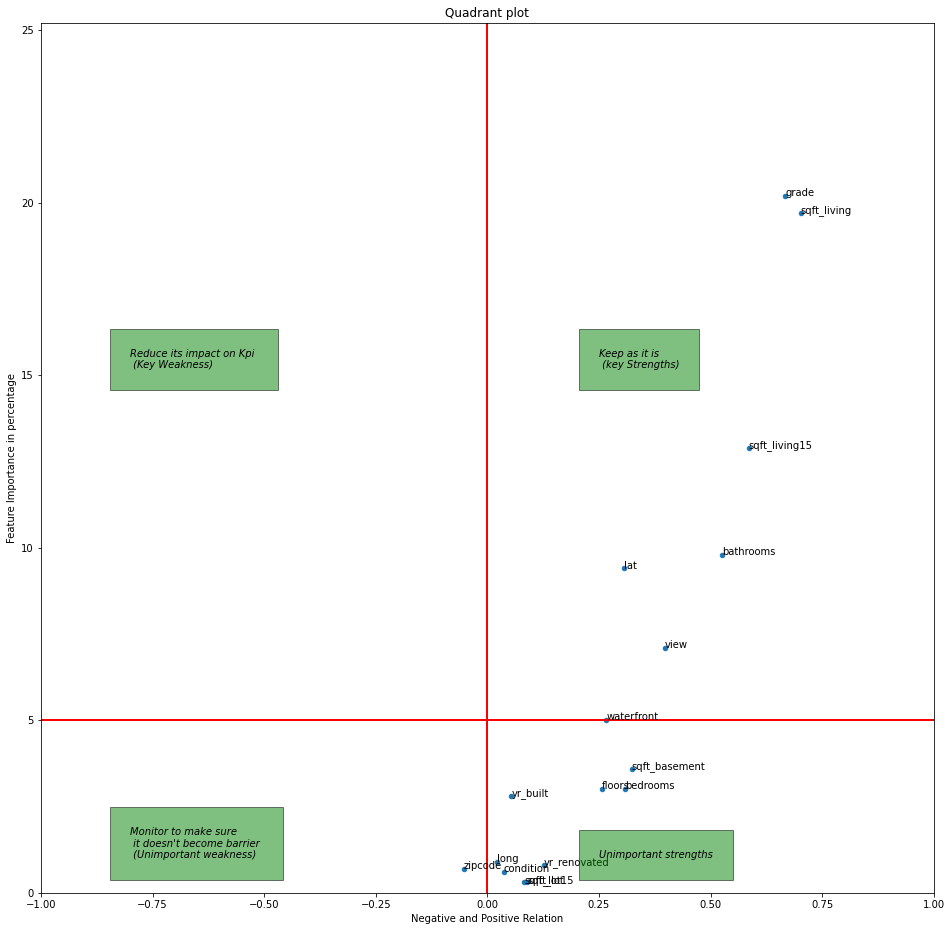

In [ ]:
y_mean=np.floor(np.mean(list(feat_dict.values())))
y_max=max(list(feat_dict.values()))+5

plt.figure(figsize=(16,16))
# Set x-axis range
plt.xlim((-1,1))
# Set y-axis range
plt.ylim((0,y_max))
# Draw lines to split quadrants
x=[0,0]
y=[0,y_max]
plt.plot([0,0],[0,y_max], linewidth=2, color='red')
x=[-1,1]
y=[y_mean,y_mean]
plt.plot(x,y, linewidth=2, color='red')
annotations=list(dict_quad.keys())
for i, label in enumerate(annotations):
    plt.annotate(label, (x_scatter[i],y_scatter[i]))
plt.scatter(x_scatter,y_scatter,s=20)
plt.text(0.25,y_max-10, 'Keep as it is \n (key Strengths)', style='italic',
        bbox={'facecolor': 'green', 'alpha': 0.5, 'pad':20})
plt.text(-0.8,y_max-10, 'Reduce its impact on Kpi \n (Key Weakness)', style='italic',
        bbox={'facecolor': 'green', 'alpha': 0.5, 'pad':20})
plt.text(-0.8,1, 'Monitor to make sure \n it doesn\'t become barrier \n (Unimportant weakness)', style='italic',
        bbox={'facecolor': 'green', 'alpha': 0.5, 'pad':20})
plt.text(0.25,1, 'Unimportant strengths', style='italic',
        bbox={'facecolor': 'green', 'alpha': 0.5, 'pad':20})
plt.title('Quadrant plot')
plt.ylabel('Feature Importance in percentage')
plt.xlabel('Negative and Positive Relation')

plt.show()

# VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [round(variance_inflation_factor(X.values, i),1) for i in range(X.shape[1])]
    return vif

In [ ]:
X=data.drop('price',axis=1)
y=data['price']

In [ ]:
calc_vif(X)

,variables,VIF
0,bedrooms,23.3
1,bathrooms,28.6
2,sqft_living,inf
3,sqft_lot,2.4
4,floors,16.9
5,waterfront,1.2
6,view,1.6
7,condition,34.7
8,grade,147.4
9,sqft_above,inf


In [ ]:
X1=X.drop('sqft_above',axis=1)
calc_vif(X1)

,variables,VIF
0,bedrooms,23.3
1,bathrooms,28.6
2,sqft_living,37.0
3,sqft_lot,2.4
4,floors,16.9
5,waterfront,1.2
6,view,1.6
7,condition,34.7
8,grade,147.4
9,sqft_basement,2.8


In [ ]:
X2=X1.drop('zipcode',axis=1)
calc_vif(X2)

,variables,VIF
0,bedrooms,23.3
1,bathrooms,28.5
2,sqft_living,36.4
3,sqft_lot,2.4
4,floors,16.7
5,waterfront,1.2
6,view,1.6
7,condition,34.7
8,grade,141.8
9,sqft_basement,2.7


In [ ]:
X3=X2.drop('long',axis=1)
calc_vif(X3)

,variables,VIF
0,bedrooms,23.2
1,bathrooms,28.3
2,sqft_living,36.3
3,sqft_lot,2.4
4,floors,16.6
5,waterfront,1.2
6,view,1.5
7,condition,34.0
8,grade,139.9
9,sqft_basement,2.7


In [ ]:
X4=X3.drop('yr_built',axis=1)
calc_vif(X4)

,variables,VIF
0,bedrooms,23.2
1,bathrooms,25.0
2,sqft_living,36.0
3,sqft_lot,2.4
4,floors,16.3
5,waterfront,1.2
6,view,1.5
7,condition,31.6
8,grade,137.8
9,sqft_basement,2.7


In [ ]:
X5=X4.drop('grade',axis=1)
calc_vif(X5)

,variables,VIF
0,bedrooms,22.6
1,bathrooms,24.4
2,sqft_living,31.2
3,sqft_lot,2.4
4,floors,16.0
5,waterfront,1.2
6,view,1.5
7,condition,31.5
8,sqft_basement,2.6
9,yr_renovated,1.1


In [ ]:
X6=X5.drop('lat',axis=1)
calc_vif(X6)

,variables,VIF
0,bedrooms,20.4
1,bathrooms,24.3
2,sqft_living,29.1
3,sqft_lot,2.4
4,floors,13.5
5,waterfront,1.2
6,view,1.5
7,condition,12.6
8,sqft_basement,2.6
9,yr_renovated,1.1


In [ ]:
X7=X6.drop('sqft_living',axis=1)
calc_vif(X7)

,variables,VIF
0,bedrooms,19.3
1,bathrooms,20.9
2,sqft_lot,2.3
3,floors,13.3
4,waterfront,1.2
5,view,1.5
6,condition,11.3
7,sqft_basement,2.2
8,yr_renovated,1.1
9,sqft_living15,14.7


In [ ]:
X8=X7.drop('bathrooms',axis=1)
calc_vif(X8)

,variables,VIF
0,bedrooms,17.3
1,sqft_lot,2.3
2,floors,9.6
3,waterfront,1.2
4,view,1.5
5,condition,11.1
6,sqft_basement,2.0
7,yr_renovated,1.1
8,sqft_living15,12.9
9,sqft_lot15,2.6


In [ ]:
X9=X8.drop('bedrooms',axis=1)
calc_vif(X9)

,variables,VIF
0,sqft_lot,2.3
1,floors,8.6
2,waterfront,1.2
3,view,1.5
4,condition,8.5
5,sqft_basement,1.8
6,yr_renovated,1.1
7,sqft_living15,11.0
8,sqft_lot15,2.6


In [ ]:
X10=X9.drop('sqft_living15',axis=1)
calc_vif(X10)

,variables,VIF
0,sqft_lot,2.3
1,floors,6.0
2,waterfront,1.2
3,view,1.4
4,condition,7.0
5,sqft_basement,1.7
6,yr_renovated,1.1
7,sqft_lot15,2.5


10 feature is removed using VIF

In [ ]:
y=data['price']
X_train,X_test,y_train,y_test=train_test_split(X10,y,test_size=0.2,random_state=0)
lr=LinearRegression()
xg=XGBRegressor()
lr.fit(X_train,y_train)
xg.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
y_pred_xg=xg.predict(X_test)
r2_score_lr=r2_score(y_pred_lr,y_test)
r2_score_xg=r2_score(y_pred_xg,y_test)
print("R2 score for all features of Linear Regression is",r2_score_lr)
print("R2 score for all features of XGboost Regression is",r2_score_xg)

[10:13:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score for all features of Linear Regression is -0.9955017392955692
R2 score for all features of XGboost Regression is -0.4143723235355299


# Lasso Regression

In [ ]:
X=sc_data.drop('price',axis=1)
y=sc_data['price']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from patsy import ModelDesc, Term, LookupFactor

response_terms = [Term([LookupFactor('price')])]

# ...then add another term for each candidate
model_terms = [Term([LookupFactor(c)]) for c in list(X.columns) ]
model_desc= ModelDesc(response_terms, model_terms)

In [ ]:
from statsmodels.formula.api import ols
from patsy import ModelDesc
from patsy.builtins import Q

LRmodel = ols(model_desc,
              data=data).fit()

print(LRmodel.summary())


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                          1.211e+04
Date:                Mon, 21 Feb 2022   Prob (F-statistic):                        0.00
Time:                        06:58:26   Log-Likelihood:                     -2.9461e+05
No. Observations:               21613   AIC:                                  5.892e+05
Df Residuals:                   21596   BIC:                                  5.894e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
la=Lasso()
params={"alpha":[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,1e1,1e2,1e3,1e4,1e5,1e6,1e7]}
model=GridSearchCV(la,param_grid=params,scoring='r2',cv=3)
model.fit(X,y)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   10.0, 100.0, 1000.0, 10000.0, 100000.0,
                                   1000000.0, 10000000.0]},
             scoring='r2')

In [ ]:
print(model.best_params_)
print(model.best_score_)

{'alpha': 100.0}
0.6947057652782833


In [ ]:
lasso=Lasso(alpha=model.best_params_['alpha'])
lasso.fit(X,y)

Lasso(alpha=100.0)

In [ ]:
coef=pd.DataFrame({"Columns":X.columns,"Lasso_coeff":lasso.coef_})
coef

,Columns,Lasso_coeff
0,bedrooms,-32987.917466
1,bathrooms,31504.757928
2,sqft_living,137846.416647
3,sqft_lot,4972.268151
4,floors,3488.584668
5,waterfront,50375.823453
6,view,40500.452152
7,condition,17081.312261
8,grade,112774.884220
9,sqft_above,25667.114419


features with zero weights need to be dropped

In [ ]:
list(coef[coef['Lasso_coeff']==0]['Columns'].values)

['sqft_basement']

In [ ]:
X=sc_data.drop(['price','sqft_basement'],axis=1)
y=sc_data['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
lr=LinearRegression()
xg=XGBRegressor()
lr.fit(X_train,y_train)
xg.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
y_pred_xg=xg.predict(X_test)
r2_score_lr=r2_score(y_pred_lr,y_test)
r2_score_xg=r2_score(y_pred_xg,y_test)
print("R2 score for all features of Linear Regression is",r2_score_lr)
print("R2 score for all features of XGboost Regression is",r2_score_xg)

[07:17:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score for all features of Linear Regression is 0.5961413354139047
R2 score for all features of XGboost Regression is 0.8414707017716522


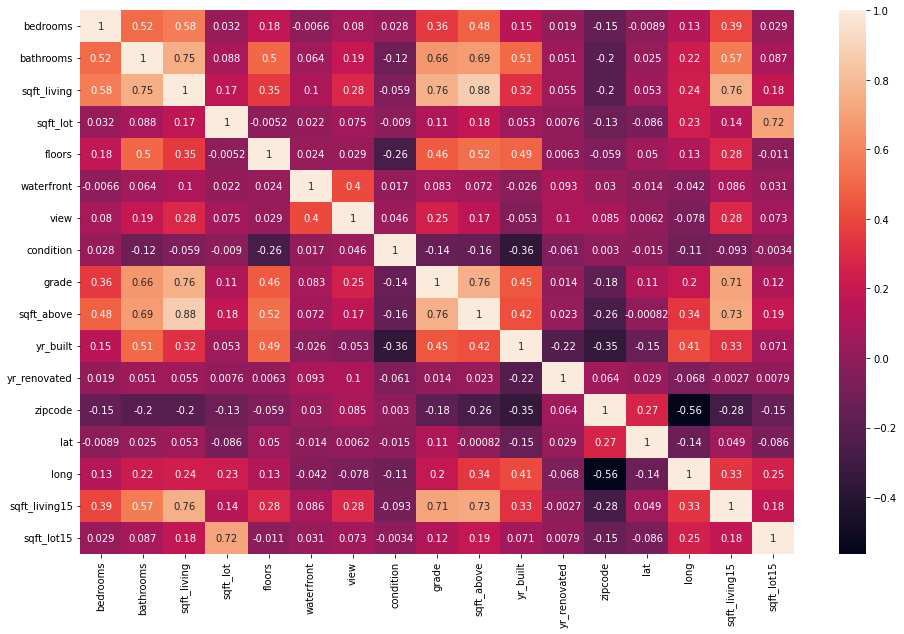

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(sc_data.drop(['price','sqft_basement'],axis=1).corr(),annot=True)

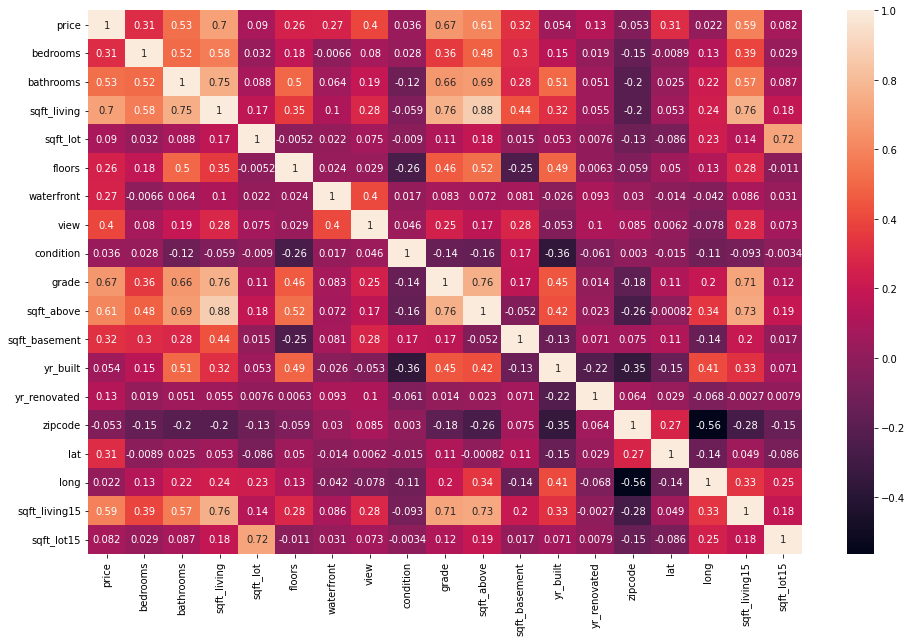

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True)

In [ ]:
dep_corr={} # Creating a dictionary to store values of correlation of dependent variables with independent variables
for column in X.columns: #Iterating over columns of X
  dep_corr[column]=abs(pearsonr(data['price'],data[column])[0])
dep_corr={k: v for k, v in sorted(dep_corr.items(), key=lambda item: item[1],reverse=False)}

In [ ]:
list(dep_corr.keys())

['long',
 'condition',
 'zipcode',
 'yr_built',
 'sqft_lot15',
 'sqft_lot',
 'yr_renovated',
 'floors',
 'waterfront',
 'lat',
 'bedrooms',
 'sqft_basement',
 'view',
 'bathrooms',
 'sqft_living15',
 'sqft_above',
 'grade',
 'sqft_living']

In [ ]:
pairs_to_drop = set() #Taking only upper triangular matrix from correlation matrix
cols =X.columns #All independent feature names

for i in range(0, X.shape[1]): 
    for j in range(0, i+1):
        pairs_to_drop.add((cols[i], cols[j]))

ind_corr = X.corr(method='pearson').abs().unstack() #Correlation among all Independent features
ind_corr = ind_corr.drop(labels=pairs_to_drop).sort_values(ascending=False)

ind_corr_df=ind_corr.reset_index() #Dataframe which contains features and their correlation values
ind_corr_df.columns=['feat1','feat2','corr_value']

In [ ]:
ind_corr_df[ind_corr_df['corr_value']>0.4][ind_corr_df['feat1']=='sqft_living']

,feat1,feat2,corr_value
0,sqft_living,sqft_above,0.876597
1,sqft_living,grade,0.762704
2,sqft_living,sqft_living15,0.756420
21,sqft_living,sqft_basement,0.435043


In [ ]:
#Less correlated features with dependent variable .#Threshold 0.4
#long, condition, zipcode, yr_built,sqft_lot15,sqft_lot,yr_renovated,floors,waterfront,lat,bedrooms,sfqt_basement,view,bathrooms,sqft_living15,sqft_above,grade,sqft_living
#No of High correlations
#long-2 (zipcode,yr_built)
#zipcode--1(long,)
#yr_built--5(bathrooms,floors,grade,sqft_above,long)
#sqft_lot15---1(sqft_lot)
#sqft_lot----1(sqft_lot15)
#yr_renovated---0
#floors---4(sqft_above,yr_built,grade,bathrooms)
#waterfront---1(view)
#lat---0
#bedrooms--3(sqft_living,bathrooms,sqft_above)
#sqft_basement--1(sqft_living,)
#view---1(waterfront)
#bathrooms---7(bedrooms,sqft_living,sqft_above,grade,sqft_living15,yr_built,floors)
#sqft_living15---4(sqft_living,sqft_above,grade,bathrooms)
#sqft_above---7(sqft_living15,yr_built,sqft_living,grade,bathrooms,floors,bedroooms)
#grade-----6(sqft_livings,bathrooms,floors,sqft_above,sqft_living15,yr_built)
#sqft_living----6(bathrooms,bedrooms,grade,sqft_Above,sqft_living15,sqft_basement)
#Among the above features removed which are having high correlation with independent features


In [ ]:
##Dropp -----long,yr_built,sqft_lot15,floors,waterfront,bedrooms,sqft_living,bathrooms,sqft_living15,sqft_Above,grade

In [ ]:
new_X=data.drop(['long','yr_built','sqft_lot15','floors','waterfront','bedrooms','sqft_living','bathrooms','sqft_living15',
                 'sqft_above','grade','price'],axis=1)

In [ ]:
sc=StandardScaler()
sc_X=sc.fit_transform(new_X)


In [ ]:
y=data['price']
X_train,X_test,y_train,y_test=train_test_split(sc_X,y,test_size=0.2,random_state=0)
lr=LinearRegression()
xg=XGBRegressor()
lr.fit(X_train,y_train)
xg.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
y_pred_xg=xg.predict(X_test)
r2_score_lr=r2_score(y_pred_lr,y_test)
r2_score_xg=r2_score(y_pred_xg,y_test)
print("R2 score for all features of Linear Regression is",r2_score_lr)
print("R2 score for all features of XGboost Regression is",r2_score_xg)

[04:01:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score for all features of Linear Regression is -0.8446637910608419
R2 score for all features of XGboost Regression is 0.3040863400059749


In [ ]:
new_X.columns

Index(['price', 'sqft_lot', 'view', 'condition', 'sqft_basement',
       'yr_renovated', 'zipcode', 'lat'],
      dtype='object')

# 1. Correlation

In [ ]:
def remove_correlated(data,dependent,threshold,complusory_feat=[]):
  """This function is used to find feature importance of independent variables
  data: you need to give the whole dataset in pandas dataframe
  complusory_feat: List containing complusory feature names
  dependent: Mention the dependent feature name in string format.
  Returns:
  removed features names
  """
  X=data.drop(dependent,axis=1) #Dropping dependent feature
  y=data[dependent] # dependent feature
  #Dropping Complusory features , so that we are not calculating correlation about those features
  X=X.select_dtypes(['number'])
#Finding correlation of all independent features
#https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

  pairs_to_drop = set() #Taking only upper triangular matrix from correlation matrix
  cols =X.columns #All independent feature names

  for i in range(0, X.shape[1]): 
      for j in range(0, i+1):
          pairs_to_drop.add((cols[i], cols[j]))

  ind_corr = X.corr(method='pearson').abs().unstack() #Correlation among all Independent features
  ind_corr = ind_corr.drop(labels=pairs_to_drop).sort_values(ascending=False)

  ind_corr_df=ind_corr.reset_index() #Dataframe which contains features and their correlation values
  ind_corr_df.columns=['feat1','feat2','corr_value']

  #Finding Correlation of dependent variable with independent variables
  dep_corr={} # Creating a dictionary to store values of correlation of dependent variables with independent variables
  for column in X.columns: #Iterating over columns of X
    dep_corr[column]=abs(pearsonr(data[dependent],data[column])[0])

  high_corr=ind_corr_df[ind_corr_df['corr_value']>threshold] #Taking all the features which are having correlation>0.4

  remove_feat=[] #List to store to highly correlated features which we will be removing.

  for i in range(high_corr.shape[0]):
    feat1=high_corr.iloc[i]['feat1']
    feat2=high_corr.iloc[i]['feat2']

    if feat1 not in remove_feat and feat2 not in remove_feat:
      if feat1 not in complusory_feat and feat2 not in complusory_feat:
        dep_feat1_corr=dep_corr[feat1]  #Feature1 correlation with dependent variable
        dep_feat2_corr=dep_corr[feat2]  #Feature2 correlation with dependent variable

        if dep_feat1_corr<dep_feat2_corr: #Checking which feature is having low correlation with dependent variable
          remove_feat.append(feat1)
        else:
          remove_feat.append(feat2)
      elif feat1 in complusory_feat and feat2 not in complusory_feat:
        remove_feat.append(feat2)
      elif feat1 not in complusory_feat and feat2 in complusory_feat:
        remove_feat.append(feat1)
      elif feat1 in complusory_feat and feat2 in complusory_feat:
        pass
  return remove_feat

In [ ]:
rem_feat=remove_correlated(data,'price',0.8)
rem_feat

['sqft_above']

# 2. Relative Importance

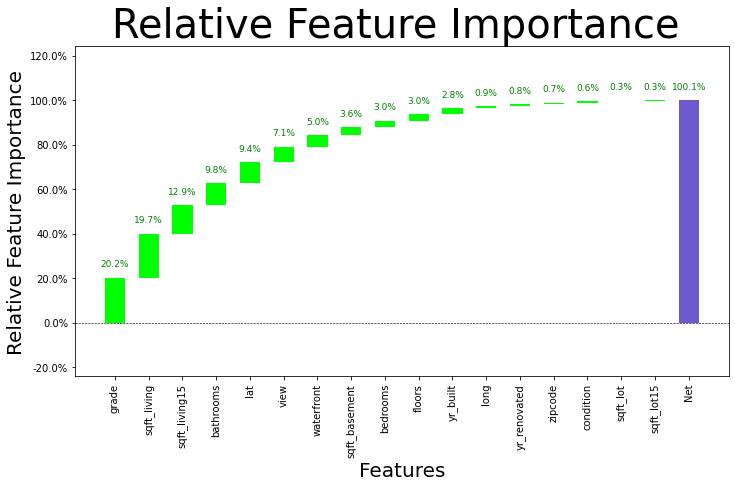

In [ ]:
new_data=data.drop(rem_feat,axis=1)
feat_dict=feature_importance(new_data,'price')
feat_imp_plot(feat_dict)

In [ ]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
data['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

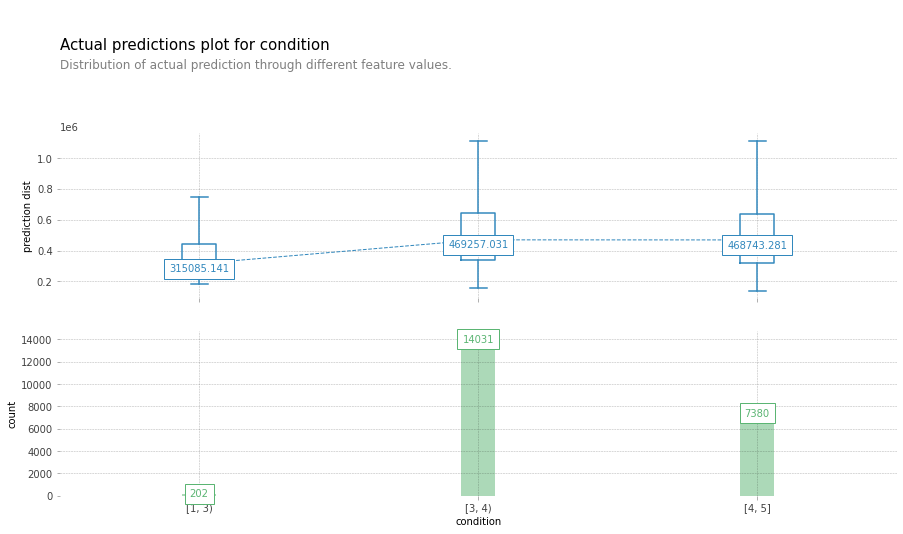

In [ ]:
from pdpbox import pdp, get_dataset, info_plots
fig, axes, summary_df = info_plots.actual_plot(
    model=model, X=data.drop('price',axis=1), feature='condition', feature_name='condition'
)

Explanation:

---

Grade accounts for 20% of What drives the price of house

In [ ]:
df_results.style.bar(subset=['normRelaImpt'], color= 'aqua')


,driver,rawRelaImpt,normRelaImpt
0,grade,0.141404,20.207874
1,sqft_living,0.137697,19.678134
2,sqft_living15,0.090250,12.897554
3,bathrooms,0.068570,9.799250
4,lat,0.065848,9.410226
5,view,0.049441,7.065620
6,waterfront,0.034865,4.982551
7,sqft_basement,0.025143,3.593217
8,floors,0.021098,3.015107
9,bedrooms,0.020848,2.979382


# 3. SHAP ANALYSIS

---



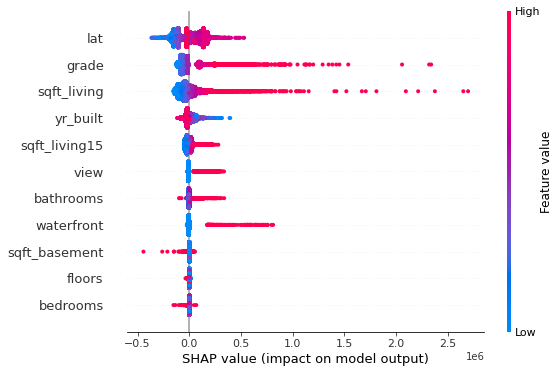

In [ ]:
shap.summary_plot(shap_values, features=sc_data[cols], feature_names=sc_data[cols].columns)


# 4. Weights analysis of Linear Regression or Kruskal Algorithm

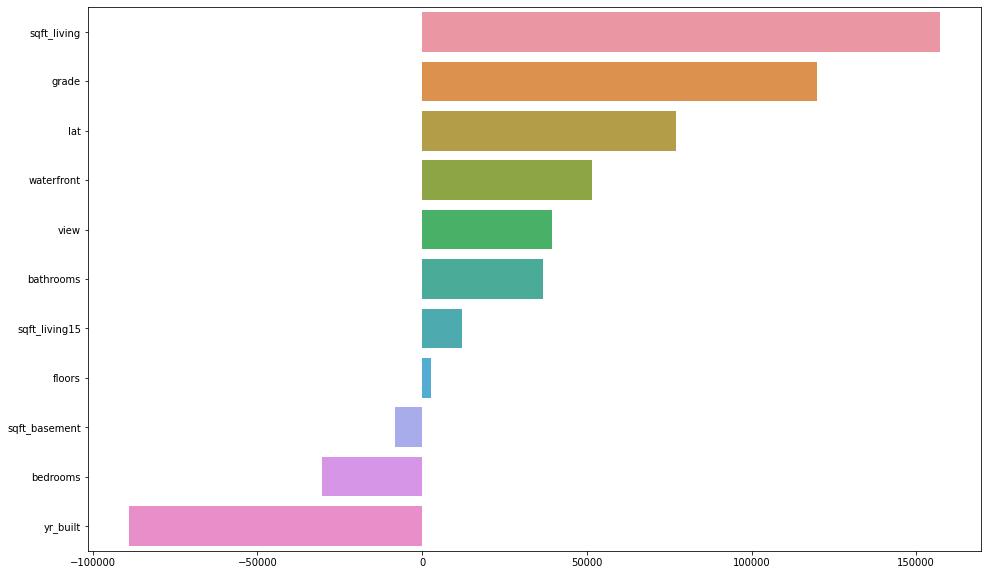

In [ ]:
plot_feature_importance(list(lr.feature_names_in_),list(lr.coef_))

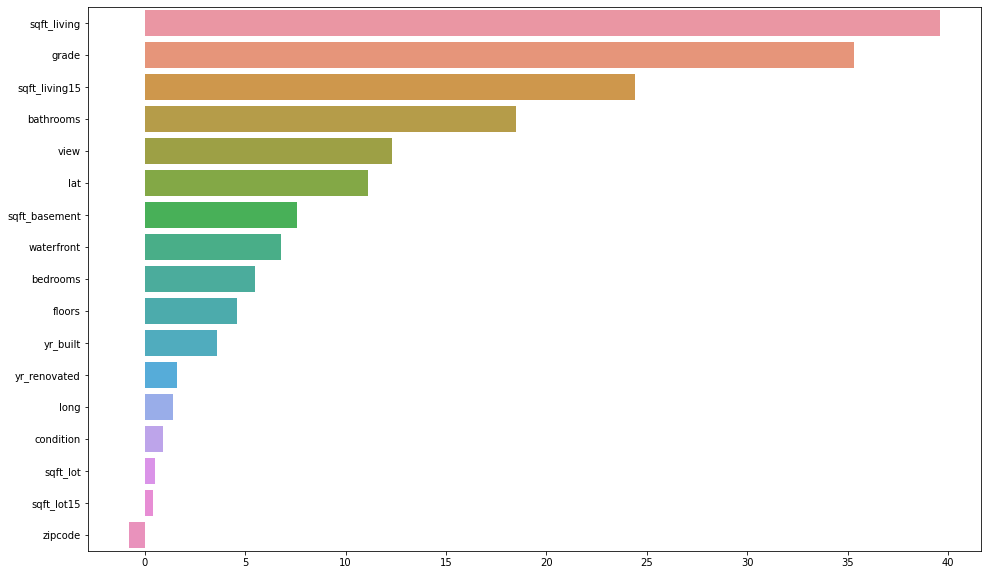

In [ ]:
plot_feature_importance(kruskal_data['driver'],kruskal_data['score'])

# 5. Key Driver Analysis Chart

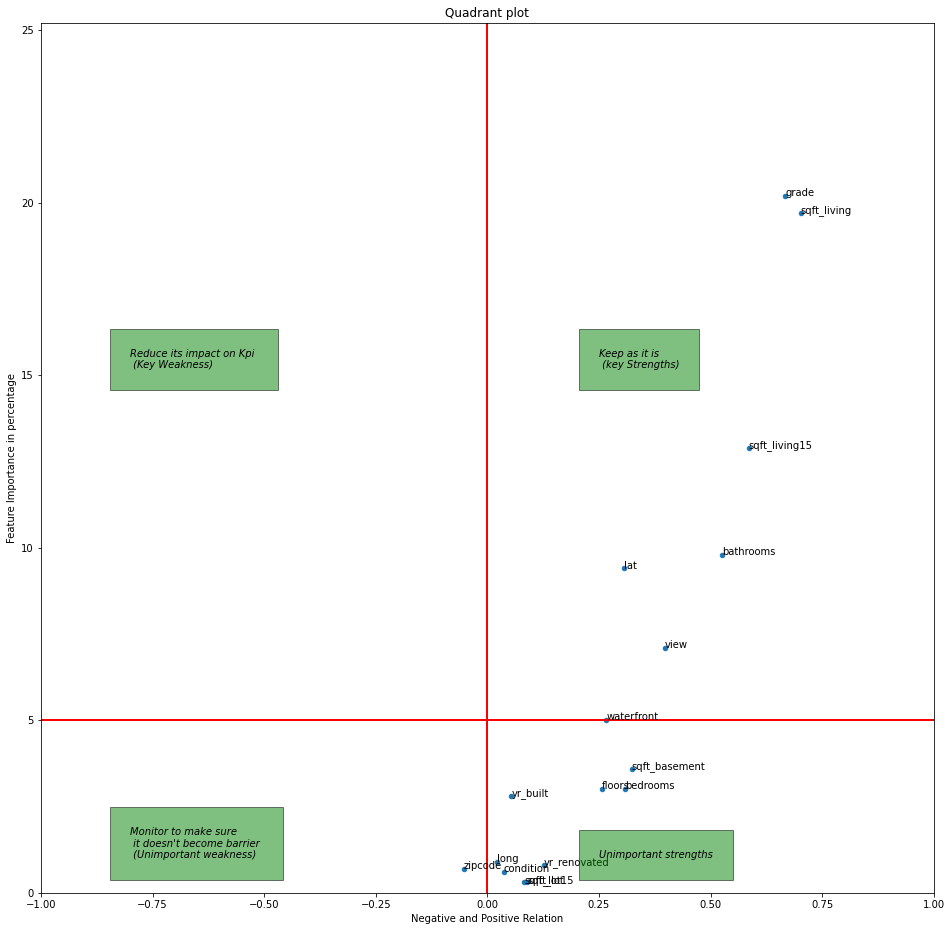

#6. Categorical Features with respect to Dependent Variable

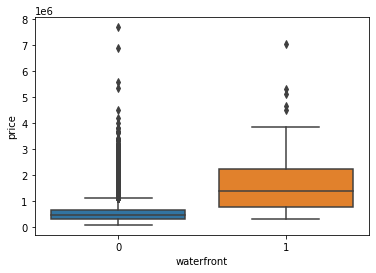

In [ ]:
sns.boxplot(x='waterfront',y='price',data=data)

In [ ]:
!pip install pdpbox

In [ ]:
from pdpbox import pdp, get_dataset, info_plots

In [ ]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(data.drop('price',axis=1),data['price'])

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


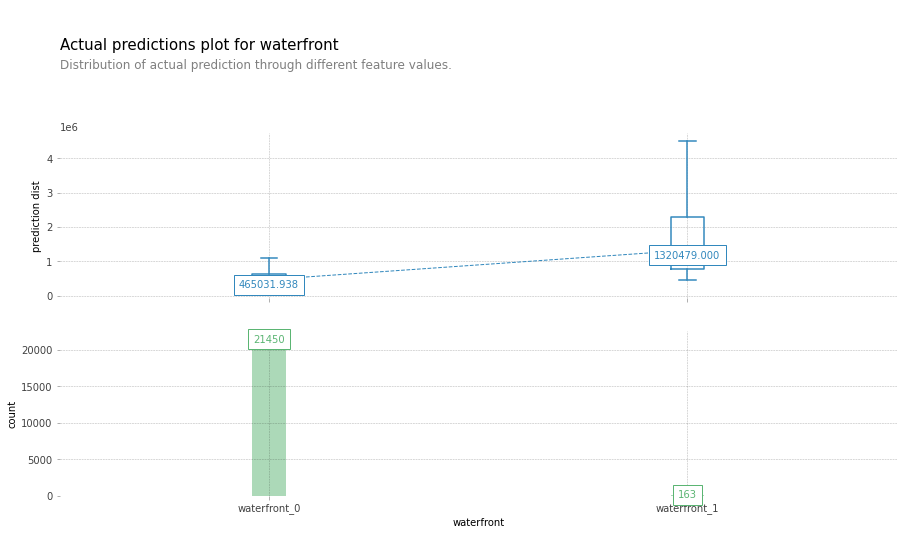

In [ ]:
from pdpbox import pdp, get_dataset, info_plots
fig, axes, summary_df = info_plots.actual_plot(
    model=model, X=data.drop('price',axis=1), feature='waterfront', feature_name='waterfront'
)

In [ ]:
data['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [ ]:
data[data['waterfront']==0]['price'].median()

450000.0

In [ ]:

data[data['waterfront']==0][data['zipcode']==98178]['price'].median()

270000.0

In [ ]:
data[data['waterfront']==1][data['zipcode']==98178]['price'].median()

825000.0

In [ ]:
data['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [ ]:
data_filter['condition'].value_counts()

3    448
5      1
4      1
Name: condition, dtype: int64

[06:34:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


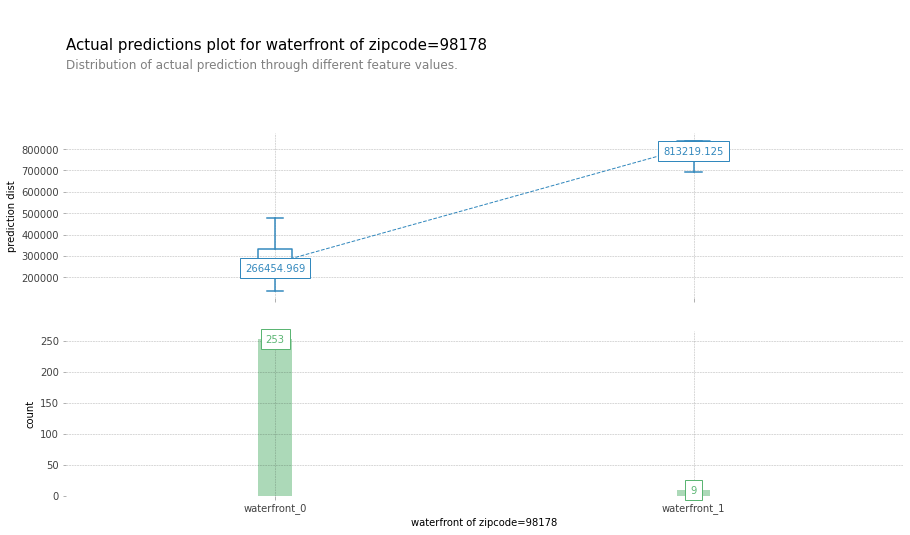

In [ ]:
data_filter=data[data['zipcode']==98178]
model=XGBRegressor()
model.fit(data_filter.drop('price',axis=1),data_filter['price'])
from pdpbox import pdp, get_dataset, info_plots
fig, axes, summary_df = info_plots.actual_plot(
    model=model, X=data_filter.drop('price',axis=1), feature='waterfront', feature_name='waterfront of zipcode=98178'
)

In [ ]:
data[data['grade']==13]['waterfront'].value_counts()

0    13
Name: waterfront, dtype: int64

[06:40:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


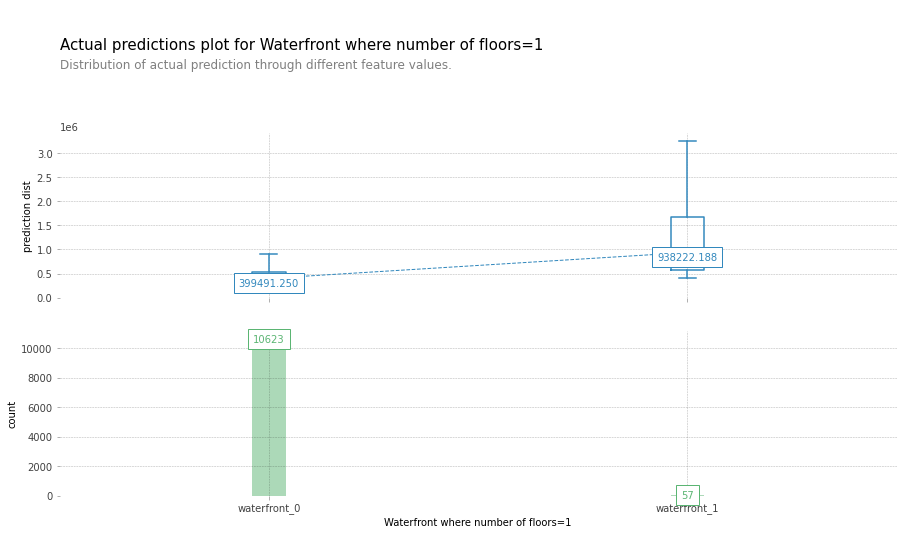

In [ ]:
data_filter=data[data['floors']==1]
model=XGBRegressor()
model.fit(data_filter.drop('price',axis=1),data_filter['price'])
from pdpbox import pdp, get_dataset, info_plots
fig, axes, summary_df = info_plots.actual_plot(
    model=model, X=data_filter.drop('price',axis=1), feature='waterfront', feature_name='Waterfront where number of floors=1'
)

In [ ]:
data[data['zipcode']==98178][data['floors']==1]['waterfront'].value_counts()

0    194
1      7
Name: waterfront, dtype: int64

[06:41:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


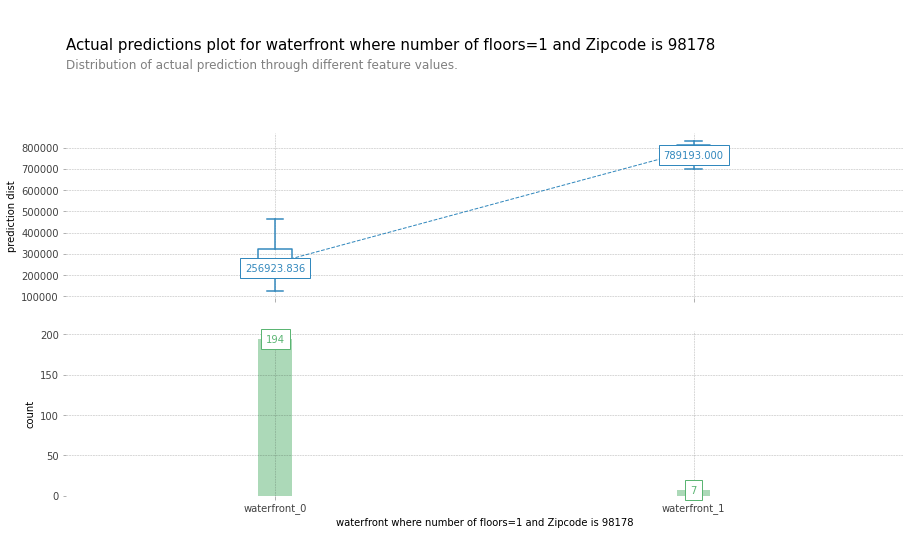

In [ ]:
data_filter=data[data['zipcode']==98178][data['floors']==1]
model=XGBRegressor()
model.fit(data_filter.drop('price',axis=1),data_filter['price'])
from pdpbox import pdp, get_dataset, info_plots
fig, axes, summary_df = info_plots.actual_plot(
    model=model, X=data_filter.drop('price',axis=1), feature='waterfront', feature_name='waterfront where number of floors=1 and Zipcode is 98178'
)

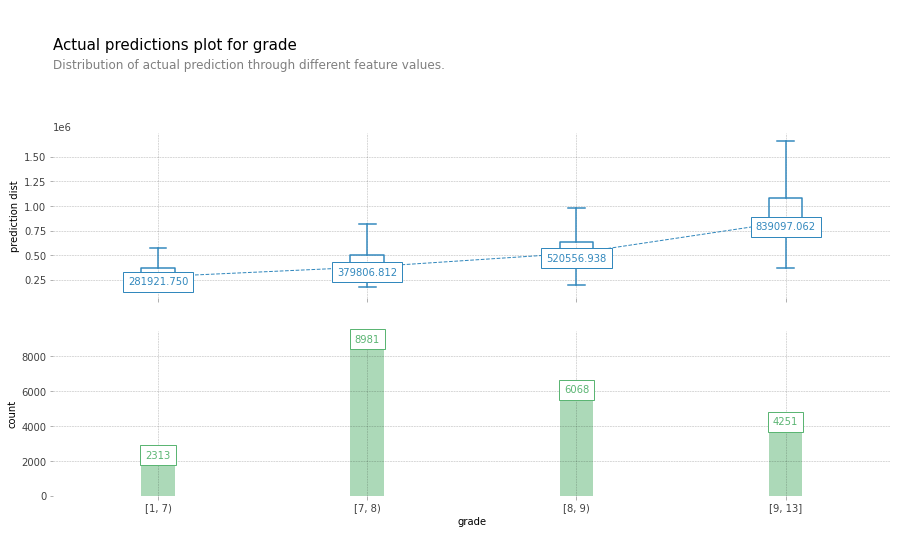

In [ ]:
from pdpbox import pdp, get_dataset, info_plots
fig, axes, summary_df = info_plots.actual_plot(
    model=model, X=data.drop('price',axis=1), feature='grade', feature_name='grade'
)

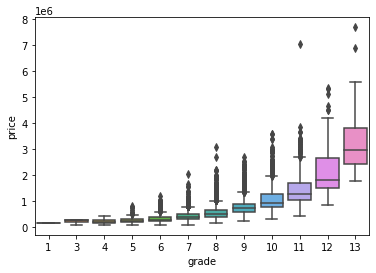

In [ ]:
sns.boxplot(x='grade',y='price',data=data)

# Numerical Feature wrto Dependent Feature

In [ ]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

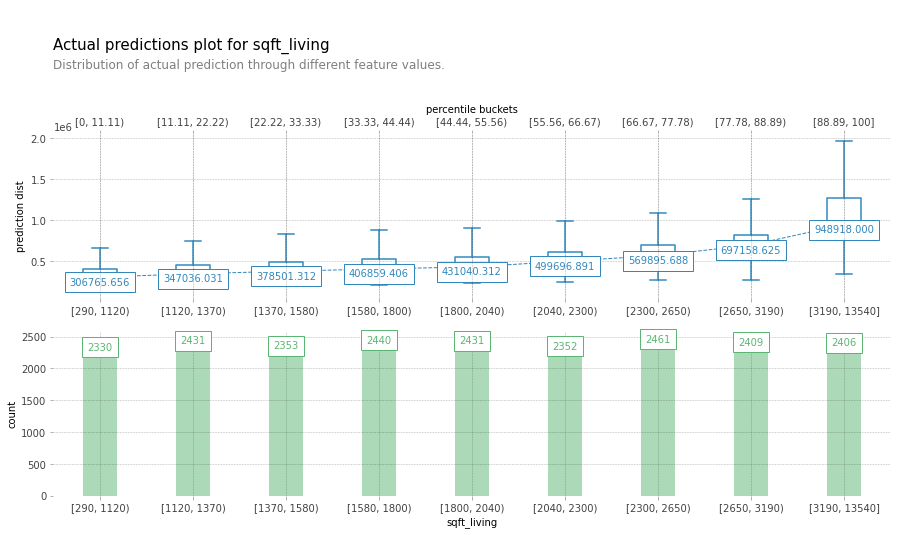

In [ ]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model, X=data.drop('price',axis=1), feature='sqft_living', feature_name='sqft_living', 
    show_percentile=True
)

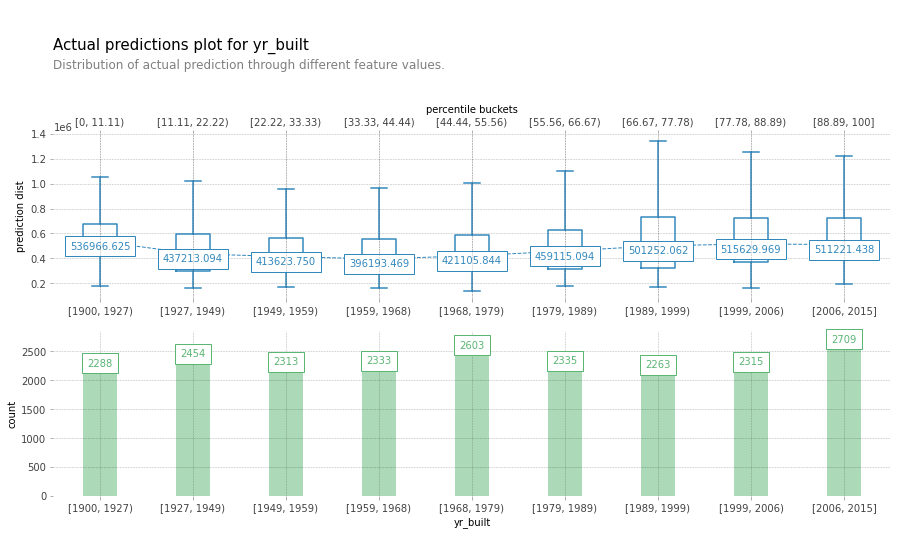

In [ ]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model, X=data.drop('price',axis=1), feature='yr_built', feature_name='yr_built', 
    show_percentile=True
)

# PDP plot

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


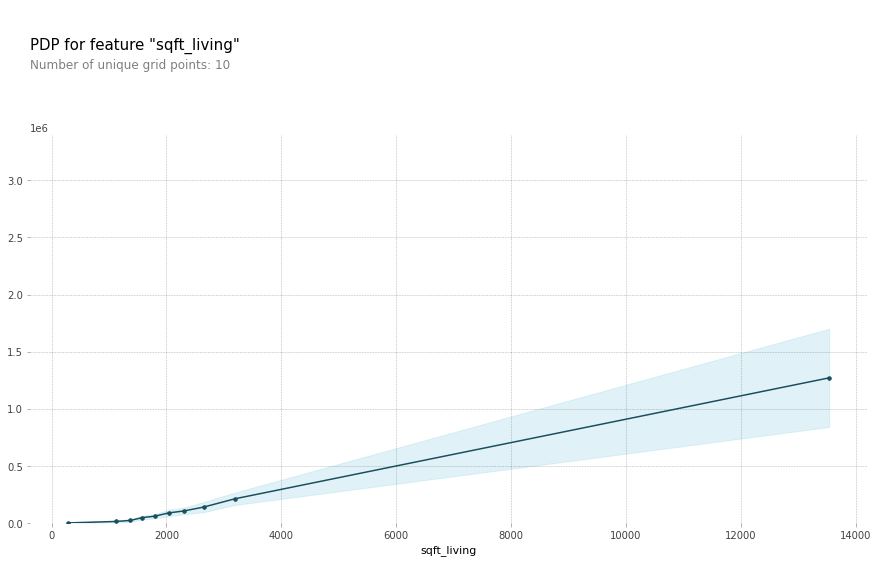

In [ ]:
pdp_weekofyear = pdp.pdp_isolate(
    model=model, dataset=data, model_features=data.drop('price',axis=1).columns, feature='sqft_living'
)
fig, axes = pdp.pdp_plot(pdp_weekofyear, 'sqft_living')

Text(0, 0.5, 'price')

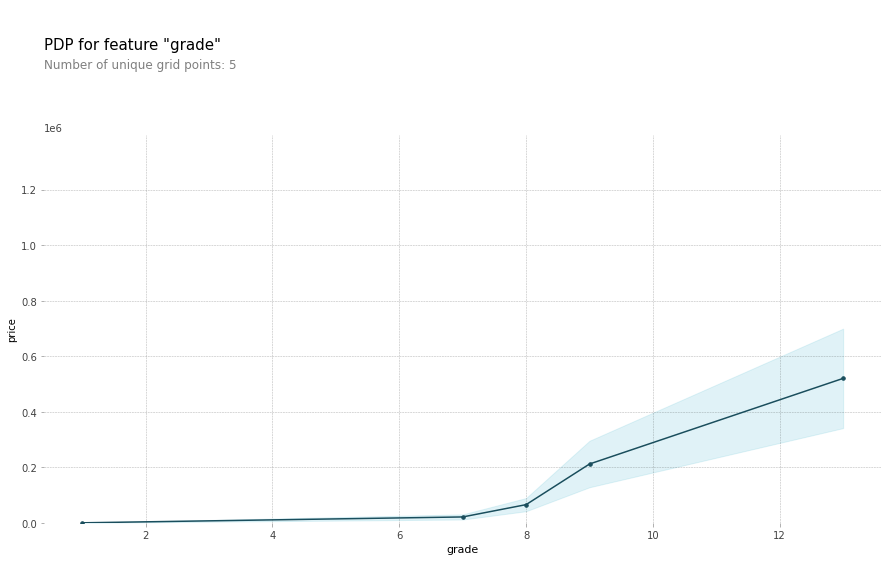

In [ ]:
pdp_weekofyear = pdp.pdp_isolate(
    model=model, dataset=data, model_features=data.drop('price',axis=1).columns, feature='grade'
)
fig, axes = pdp.pdp_plot(pdp_weekofyear, 'grade')
plt.ylabel('price')

In [ ]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Text(0, 0.5, 'price')

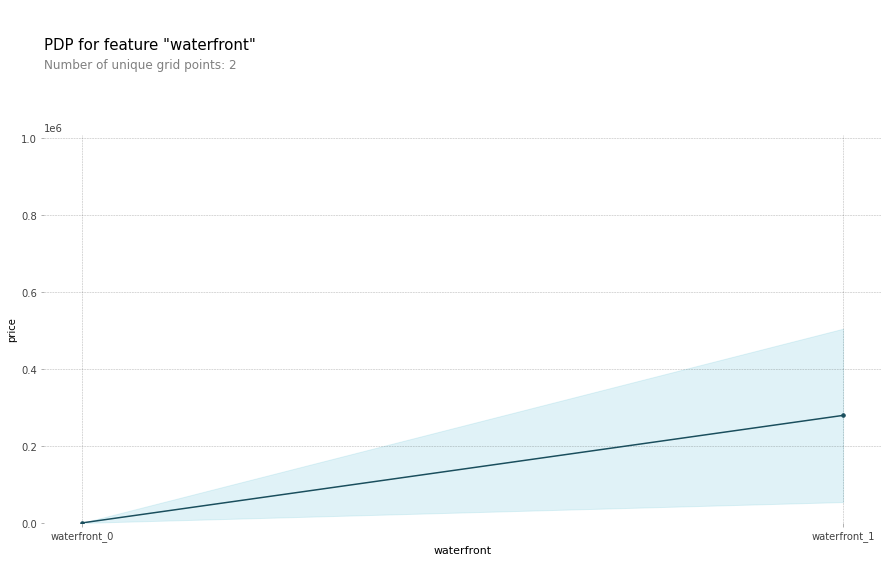

In [ ]:
pdp_weekofyear = pdp.pdp_isolate(
    model=model, dataset=data, model_features=data.drop('price',axis=1).columns, feature='waterfront'
)
fig, axes = pdp.pdp_plot(pdp_weekofyear, 'waterfront')
plt.ylabel('price')

Text(0, 0.5, 'price')

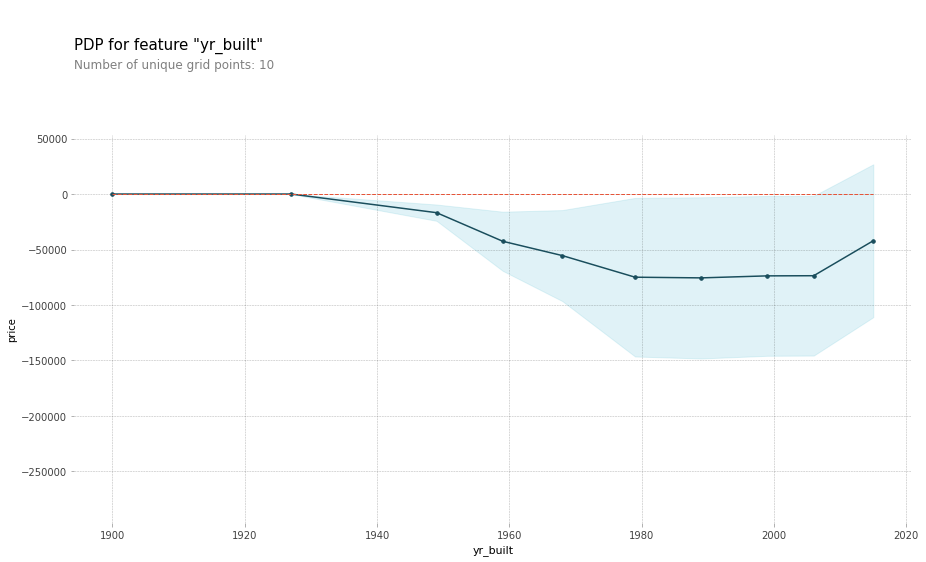

In [ ]:
pdp_weekofyear = pdp.pdp_isolate(
    model=model, dataset=data, model_features=data.drop('price',axis=1).columns, feature='yr_built'
)
fig, axes = pdp.pdp_plot(pdp_weekofyear, 'yr_built')
plt.ylabel('price')

#Two independent feature interactions with respect to Dependent Feature

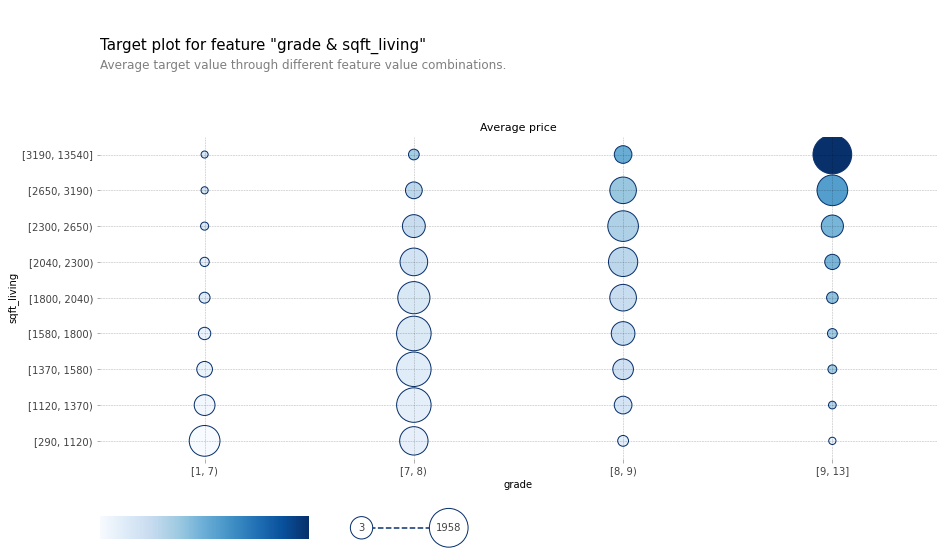

In [ ]:
fig, axes, summary_df = info_plots.target_plot_interact(
    df=data, features=['grade', 'sqft_living'], 
    feature_names=['grade', 'sqft_living'], target='price'
)

In [ ]:
inter_rf = pdp.pdp_interact(
    model=model, dataset=data, model_features=data.drop('price',axis=1).columns, 
    features=['grade','sqft_living']
)

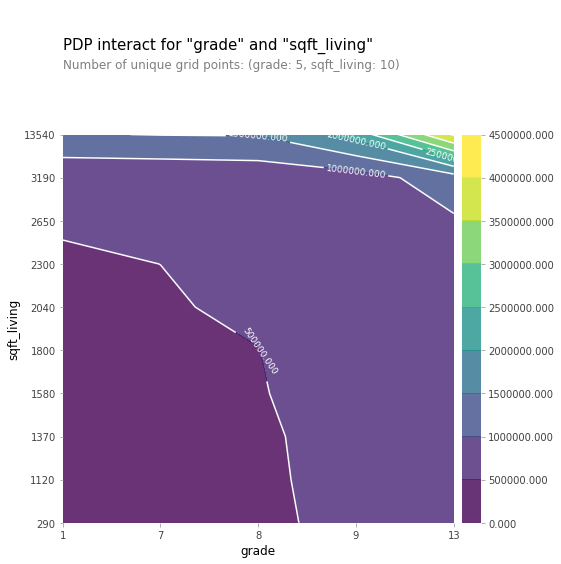

In [ ]:
fig, axes = pdp.pdp_interact_plot(
    inter_rf, ['grade', 'sqft_living'], x_quantile=True, plot_type='contour', plot_pdp=False
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


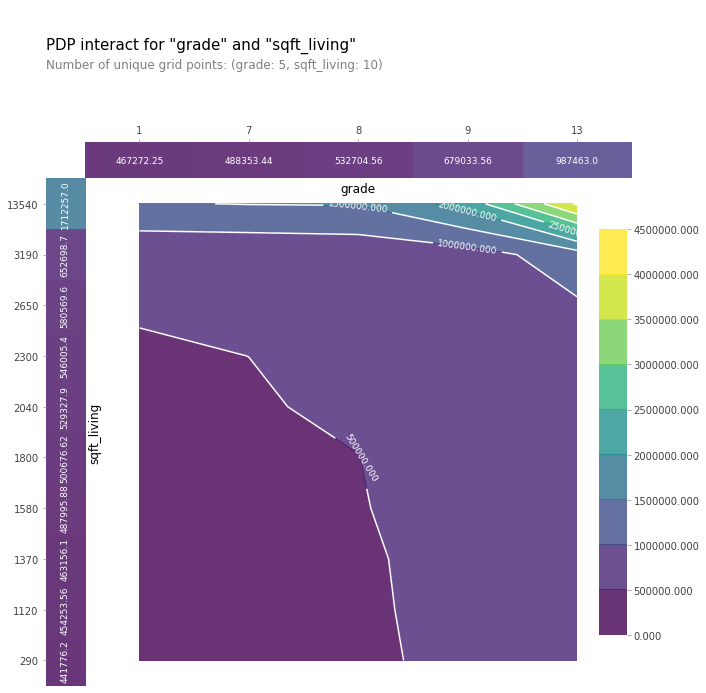

In [ ]:
fig, axes = pdp.pdp_interact_plot(
    inter_rf, ['grade', 'sqft_living'], x_quantile=True, plot_type='contour', plot_pdp=True
)

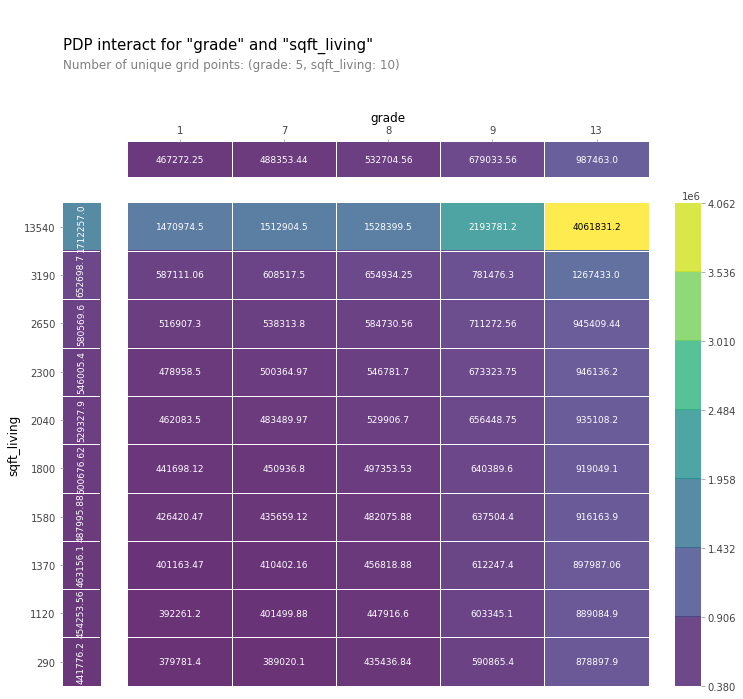

In [ ]:
fig, axes = pdp.pdp_interact_plot(
    inter_rf, ['grade', 'sqft_living'], x_quantile=True, plot_type='grid', plot_pdp=True
)

# Classification

In [ ]:
df=pd.read_csv('DS_dataset.csv')
df.head()

,Customer_ID,Var1,Var2,Group,Category,Rating,Purchased_ABC_product
0,5518,41.534,12.123,G1,C1,Bronze,0
1,40515,9.445,0.256,G1,C1,Bronze,0
2,52697,37.599,3.199,G1,C2,Gold,0
3,68202,81.514,1.645,G1,C1,Silver,0
4,130003,46.805,1.706,G1,C1,Silver,0


In [ ]:
df.drop('Customer_ID',axis=1,inplace=True)

#Chisquare test for correlation of categorical features

In [ ]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
# Cross tabulation between group and category
CrosstabResult=pd.crosstab(index=df['Group'],columns=df['Category'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
#Assumption(H0): The two columns are independent to each other 
# P-Value is the Probability of H0 being True
# If P-Value>=0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

Category     C1    C2    C3    C4    C5
Group                                  
G1        10070  2390  4580   691  1634
G2           94     9    49   129    17
G3          232   737   185    20   588
G4          263    46   117    29    39
G5         4094   818  1684  1269   693
G6          171    30    79    16    16
G7            8     1     6     0     6
G8            2     0     7    10     0
The P-Value of the ChiSq Test is: 0.0


In [ ]:
ChiSqResult

(4802.733198760909,
 0.0,
 28,
 array([[9.38067761e+03, 2.53204175e+03, 4.21295063e+03, 1.35930001e+03,
         1.88003000e+03],
        [1.44355380e+02, 3.89645464e+01, 6.48313601e+01, 2.09177074e+01,
         2.89310065e+01],
        [8.53537513e+02, 2.30387687e+02, 3.83331733e+02, 1.23681209e+02,
         1.71061857e+02],
        [2.39300529e+02, 6.45922346e+01, 1.07472120e+02, 3.46756625e+01,
         4.79594538e+01],
        [4.14561523e+03, 1.11898855e+03, 1.86183483e+03, 6.00717247e+02,
         8.30844140e+02],
        [1.51137176e+02, 4.07950955e+01, 6.78771287e+01, 2.19004184e+01,
         3.02901813e+01],
        [1.01726945e+01, 2.74582374e+00, 4.56865289e+00, 1.47406663e+00,
         2.03876220e+00],
        [9.20386649e+00, 2.48431671e+00, 4.13354309e+00, 1.33367933e+00,
         1.84459438e+00]]))

In [ ]:
df_cat=df[['Group', 'Category', 'Rating']]

In [ ]:
from sklearn.feature_selection import chi2

resultant = pd.DataFrame(data=[(0 for i in range(len(df_cat.columns))) for i in range(len(df_cat.columns))], 
                         columns=list(df_cat.columns))
resultant.set_index(pd.Index(list(df_cat.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in ['Group','Category','Rating']:
    for j in ['Group','Category','Rating']:
        if i != j:
            chi2_val, p_val = chi2(np.array(df_cat[i]).reshape(-1, 1), np.array(df_cat[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

ValueError: ignored

# Onehot

In [ ]:
def one_hot_encoding(data):
  """This function is used for one hot encoding of categorical features of a Regression problem"""
  new_df=pd.DataFrame()
  flags_ohe=data.copy(deep=True)
  high_cat_column=[]
  cat_col=data.select_dtypes('object').columns
  for column in cat_col:
    if len(data[column].value_counts())>10:
      for label in list(data[column].value_counts().reset_index().iloc[:10,0]):
        new_df[column+'_'+label]= np.where(data[column]==label,1,0)
      high_cat_column.append(column)
    else:
      col_ohe = pd.get_dummies(data[column], prefix=column,drop_first=True)
      flags_ohe = pd.concat((flags_ohe, col_ohe), axis=1).drop(column, axis=1)

  data1=pd.concat([flags_ohe,new_df],axis=1).drop(high_cat_column,axis=1)

  return data1

In [ ]:
df_new=one_hot_encoding(df)

In [ ]:
df_new.head()

,Var1,Var2,Purchased_ABC_product,Group_G2,Group_G3,Group_G4,Group_G5,Group_G6,Group_G7,Group_G8,Category_C2,Category_C3,Category_C4,Category_C5,Rating_Gold,Rating_Silver
0,41.534,12.123,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9.445,0.256,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,37.599,3.199,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,81.514,1.645,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,46.805,1.706,0,0,0,0,0,0,0,0,0,0,0,0,0,1


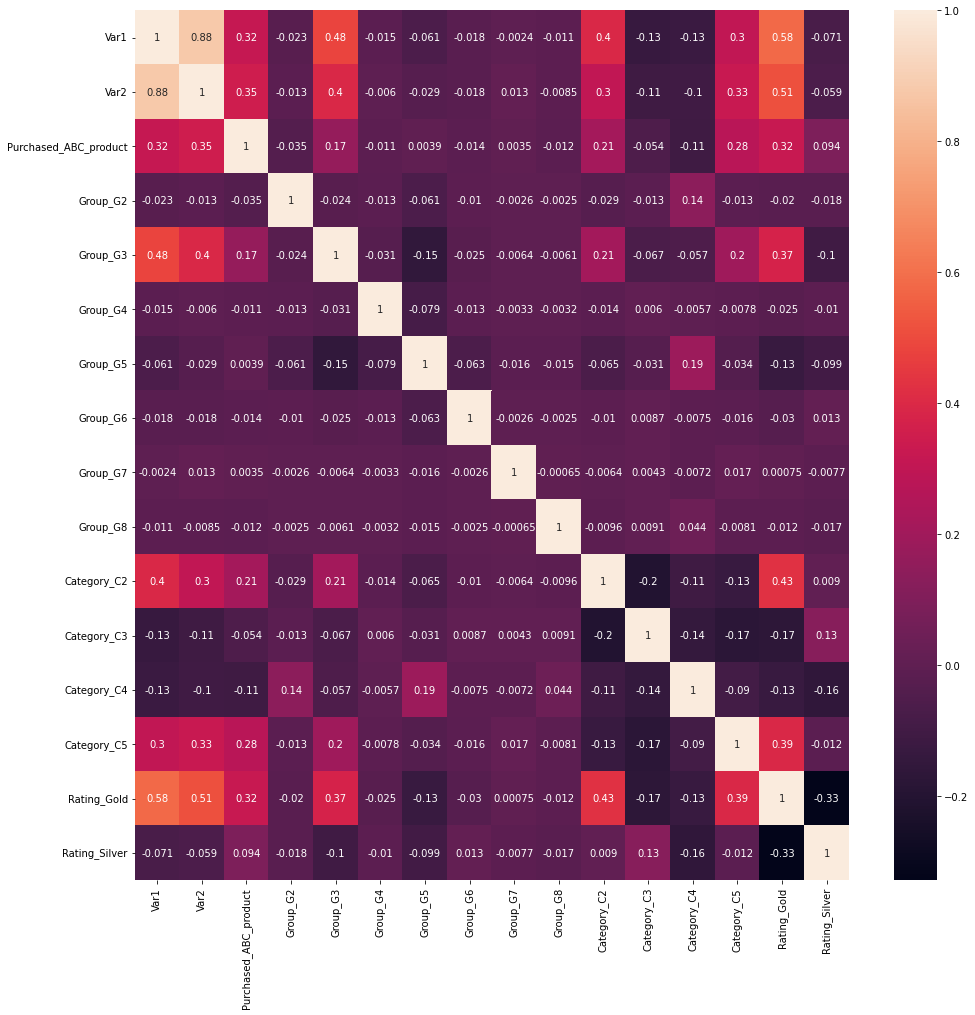

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(df_new.corr(),annot=True)

# Modelling with all features


In [ ]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score

In [ ]:
X=df_new.drop('Purchased_ABC_product',axis=1)
y=df_new['Purchased_ABC_product']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
xg=XGBClassifier()
xg.fit(X_train,y_train)
y_pred_xg=xg.predict(X_test)
acc_lr=accuracy_score(y_test,y_pred_lr)
auc_lr=roc_auc_score(y_test,y_pred_lr)
acc_xg=accuracy_score(y_test,y_pred_xg)
auc_xg=roc_auc_score(y_test,y_pred_xg)
print("Accuracy and AUC of Logistic Regression is {:.2f} and {:.2f}".format(acc_lr,auc_lr))
print("Accuracy and AUC of Xgboost is {:.2f} and {:.2f}".format(acc_xg,auc_xg))

Accuracy and AUC of Logistic Regression is 0.75 and 0.75
Accuracy and AUC of Xgboost is 0.77 and 0.77


# Threshold 0.8

In [ ]:
rem_feat=remove_correlated(df_new,'Purchased_ABC_product',0.8)
rem_feat

['Var1']

In [ ]:
X=df_new.drop(['Purchased_ABC_product','Var1', 'Group_G5'],axis=1)
y=df_new['Purchased_ABC_product']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
xg=XGBClassifier()
xg.fit(X_train,y_train)
y_pred_xg=xg.predict(X_test)
acc_lr=accuracy_score(y_test,y_pred_lr)
auc_lr=roc_auc_score(y_test,y_pred_lr)
acc_xg=accuracy_score(y_test,y_pred_xg)
auc_xg=roc_auc_score(y_test,y_pred_xg)
print("Accuracy and AUC of Logistic Regression is {:.2f} and {:.2f}".format(acc_lr,auc_lr))
print("Accuracy and AUC of Xgboost is {:.2f} and {:.2f}".format(acc_xg,auc_xg))

Accuracy and AUC of Logistic Regression is 0.74 and 0.75
Accuracy and AUC of Xgboost is 0.77 and 0.77


In [ ]:
X=df_new['Var1']
y=df_new['Purchased_ABC_product']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)
lr=LogisticRegression()
lr.fit(X_train.values.reshape(-1,1),y_train)
y_pred_lr=lr.predict(X_test.values.reshape(-1,1))
xg=XGBClassifier()
xg.fit(X_train.values.reshape(-1,1),y_train)
y_pred_lr=lr.predict(X_test.values.reshape(-1,1))
y_pred_xg=xg.predict(X_test.values.reshape(-1,1))
acc_lr=accuracy_score(y_test,y_pred_lr)
auc_lr=roc_auc_score(y_test,y_pred_lr)
acc_xg=accuracy_score(y_test,y_pred_xg)
auc_xg=roc_auc_score(y_test,y_pred_xg)
print("Accuracy and AUC of Logistic Regression is {:.2f} and {:.2f}".format(acc_lr,auc_lr))
print("Accuracy and AUC of Xgboost is {:.2f} and {:.2f}".format(acc_xg,auc_xg))

Accuracy and AUC of Logistic Regression is 0.69 and 0.70
Accuracy and AUC of Xgboost is 0.71 and 0.71


# Relative Importance

In [ ]:
feat_dict

{'Category_C2': 11.5,
 'Category_C3': 0.5,
 'Category_C4': 1.8,
 'Category_C5': 21.0,
 'Group_G2': 0.2,
 'Group_G3': 3.8,
 'Group_G5': 0.9,
 'Rating_Gold': 23.3,
 'Rating_Silver': 9.0,
 'Var2': 28.0}

In [ ]:
feat_imp_plot(feat_dict)

<IPython.core.display.Javascript object>

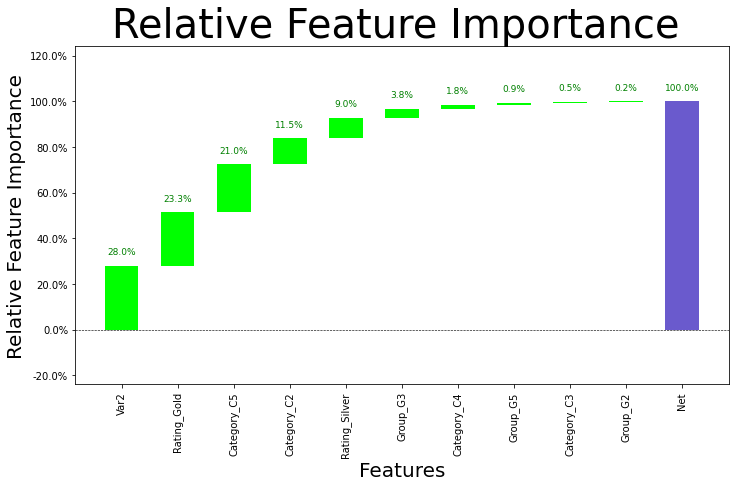

In [ ]:
rem_feat=remove_correlated(df_new,'Purchased_ABC_product',0.8)
df_new1=df_new.drop(rem_feat,axis=1)
feat_dict=feature_importance(df_new1,'Purchased_ABC_product')
feat_imp_plot(feat_dict)

In [ ]:
rem_feat

['Var1']

In [ ]:
col=list(df_new.drop(['Purchased_ABC_product','Var1'],axis=1).columns)
df_results = relativeImp(df_new, outcomeName ='Purchased_ABC_product', driverNames =col )
df_results.sort_values(by='normRelaImpt',ascending=False,axis=0,inplace=True)
df_results.reset_index(drop=True,inplace=True)
df_results.style.bar(subset=['normRelaImpt'], color= 'aqua')

,driver,rawRelaImpt,normRelaImpt
0,Var2,0.058466,27.950509
1,Rating_Gold,0.048795,23.327040
2,Category_C5,0.043966,21.018656
3,Category_C2,0.024015,11.480737
4,Rating_Silver,0.018810,8.992403
5,Group_G3,0.007872,3.763354
6,Category_C4,0.003746,1.790779
7,Group_G5,0.001857,0.887796
8,Category_C3,0.000995,0.475469
9,Group_G2,0.000518,0.247561


# SHAP ANALYSIS

In [ ]:
!pip install shap
import shap
shap.initjs()

In [ ]:
from xgboost import XGBClassifier
X=df_new.drop(['Var1','Purchased_ABC_product'],axis=1)
y=df_new['Purchased_ABC_product']
xg=XGBClassifier()
xg.fit(X,y)
explainer = shap.TreeExplainer(xg)
shap_values = explainer.shap_values(X)

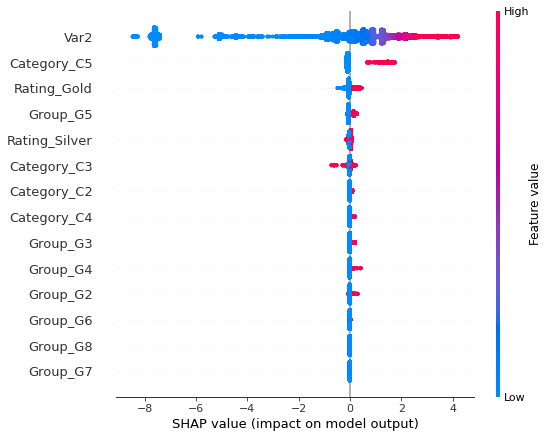

In [ ]:

fig=shap.summary_plot(shap_values, features=X, feature_names=X.columns)


In [ ]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    


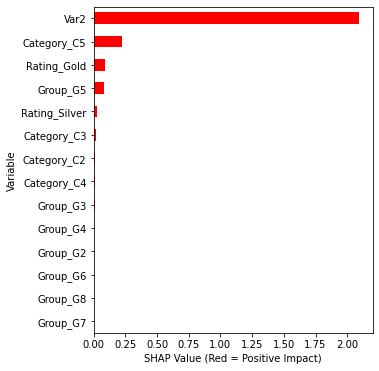

In [ ]:
ABS_SHAP(shap_values,X) 

# Kruskal's


In [ ]:
!pip install Kruskals

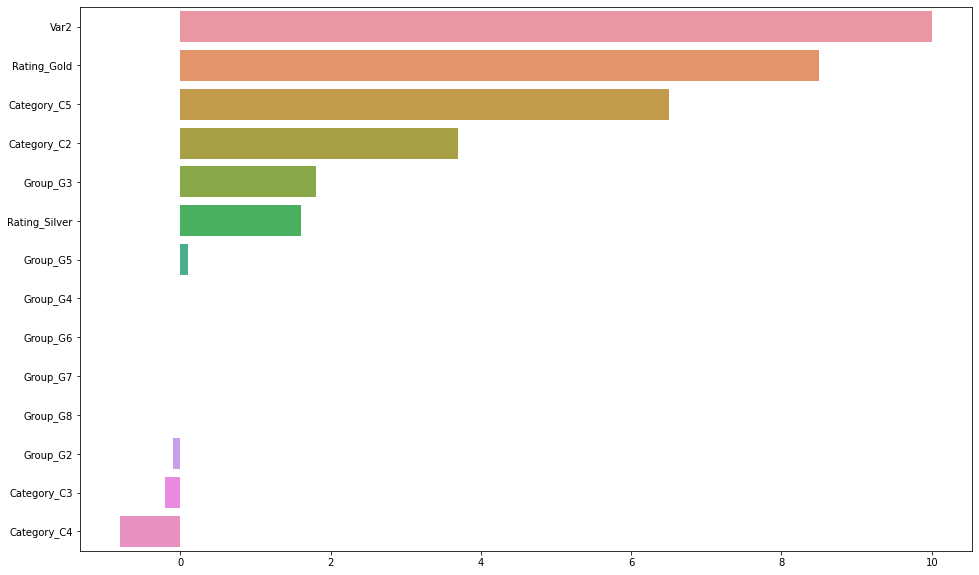

In [ ]:
import Kruskals
kruskal_data=Kruskals.Kruskals.from_pandas_df(df_new, df_new.drop(['Purchased_ABC_product','Var1'],axis=1).columns, 'Purchased_ABC_product').driver_score_to_series(directional=True).reset_index()
kruskal_data['score']=kruskal_data['score'].apply(lambda x:x*100).round(1)
plot_feature_importance(kruskal_data['driver'],kruskal_data['score'])

# Key Driver Analysis Chart

# Categorical Features with respect to Dependent Variable

In [ ]:
!pip install pdpbox
from pdpbox import pdp, get_dataset, info_plots


In [ ]:
def one_hot_encoding1(data):
  """This function is used for one hot encoding of categorical features of a Regression problem"""
  new_df=pd.DataFrame()
  flags_ohe=data.copy(deep=True)
  high_cat_column=[]
  cat_col=data.select_dtypes('object').columns
  for column in cat_col:
    if len(data[column].value_counts())>10:
      for label in list(data[column].value_counts().reset_index().iloc[:10,0]):
        new_df[column+'_'+label]= np.where(data[column]==label,1,0)
      high_cat_column.append(column)
    else:
      col_ohe = pd.get_dummies(data[column], prefix=column,drop_first=False)
      flags_ohe = pd.concat((flags_ohe, col_ohe), axis=1).drop(column, axis=1)

  data1=pd.concat([flags_ohe,new_df],axis=1).drop(high_cat_column,axis=1)

  return data1
df_new2=one_hot_encoding1(df)

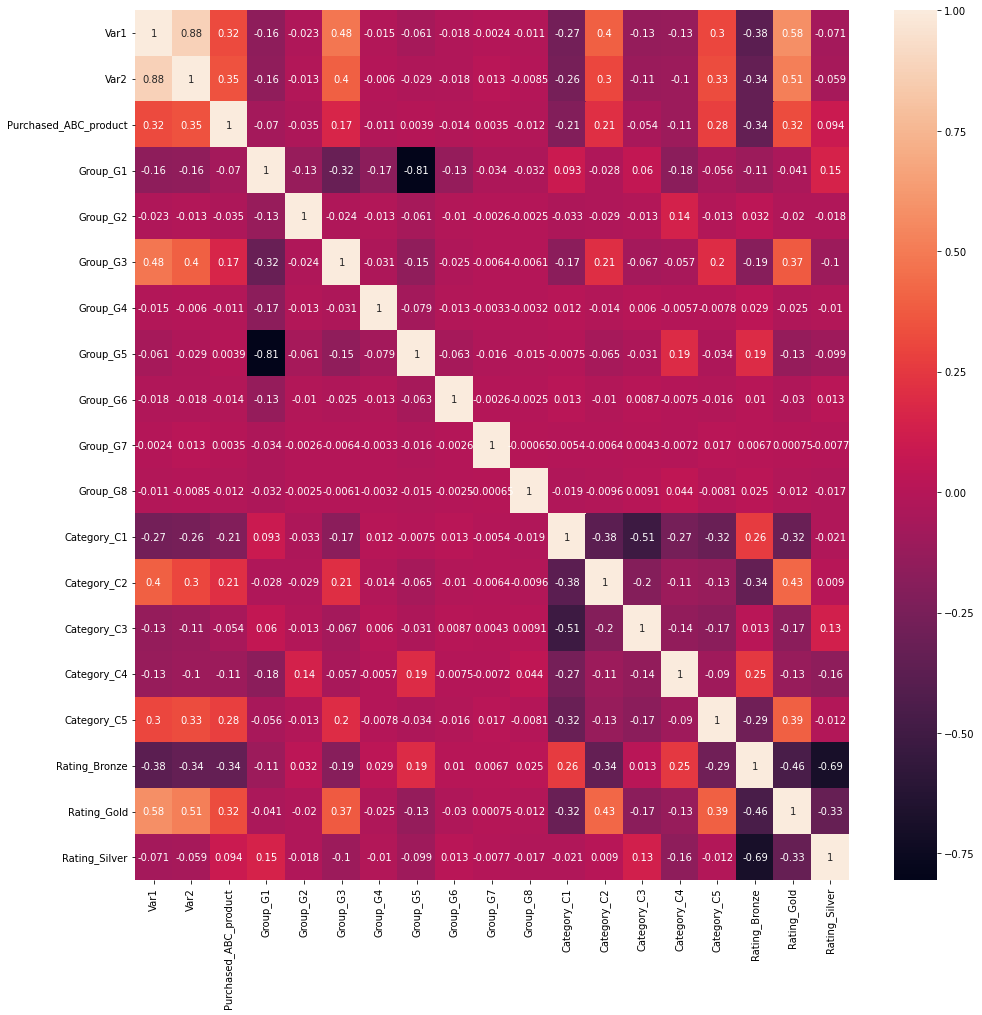

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(df_new2.corr(),annot=True)

In [ ]:
feature_importance(df_new2.drop(['Var1', 'Group_G5','Category_C3','Rating_Silver'],axis=1),'Purchased_ABC_product')

{'Category_C1': 6.0,
 'Category_C2': 8.2,
 'Category_C4': 2.5,
 'Category_C5': 16.6,
 'Group_G1': 2.0,
 'Group_G2': 0.4,
 'Group_G3': 2.3,
 'Group_G4': 0.1,
 'Group_G6': 0.1,
 'Rating_Bronze': 23.9,
 'Rating_Gold': 13.5,
 'Var2': 24.4}

In [ ]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
X=df_new.drop(['Var1','Purchased_ABC_product'],axis=1)
y=df_new['Purchased_ABC_product']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
xg=XGBClassifier()
xg.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
y_pred_xg=xg.predict(X_test)
acc_lr=accuracy_score(y_test,y_pred_lr)
auc_lr=roc_auc_score(y_test,y_pred_lr)
acc_xg=accuracy_score(y_test,y_pred_xg)
auc_xg=roc_auc_score(y_test,y_pred_xg)
print("Accuracy and AUC of Logistic Regression is {:.2f} and {:.2f}".format(acc_lr,auc_lr))
print("Accuracy and AUC of Xgboost is {:.2f} and {:.2f}".format(acc_xg,auc_xg))


Accuracy and AUC of Logistic Regression is 0.75 and 0.75
Accuracy and AUC of Xgboost is 0.77 and 0.77


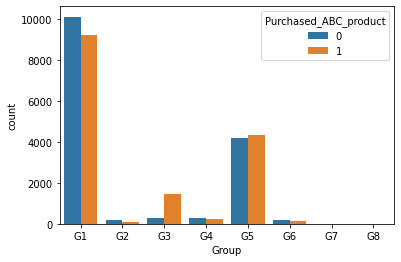

In [ ]:
sns.countplot(df['Group'],hue=df['Purchased_ABC_product'])

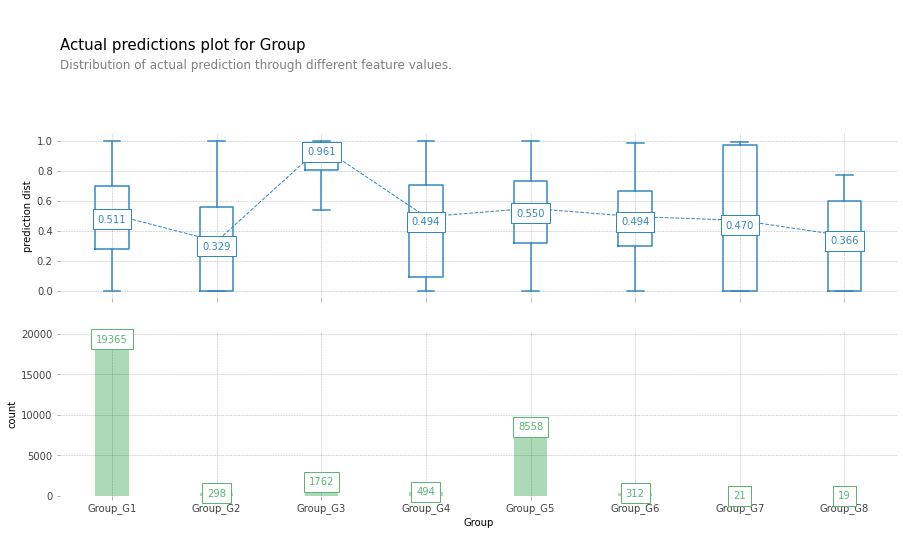

In [ ]:
from xgboost import XGBClassifier
X=df_new2.drop(['Purchased_ABC_product'],axis=1)
y=df_new2['Purchased_ABC_product']
xg=XGBClassifier()
xg.fit(X,y)
fig, axes, summary_df = info_plots.actual_plot(
    model=xg, X=X, feature=['Group_G1','Group_G2','Group_G3','Group_G4',
                            'Group_G5','Group_G6','Group_G7','Group_G8'], feature_name='Group'
)

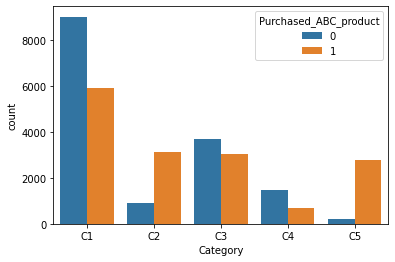

In [ ]:
sns.countplot(df['Category'],hue=df['Purchased_ABC_product'])

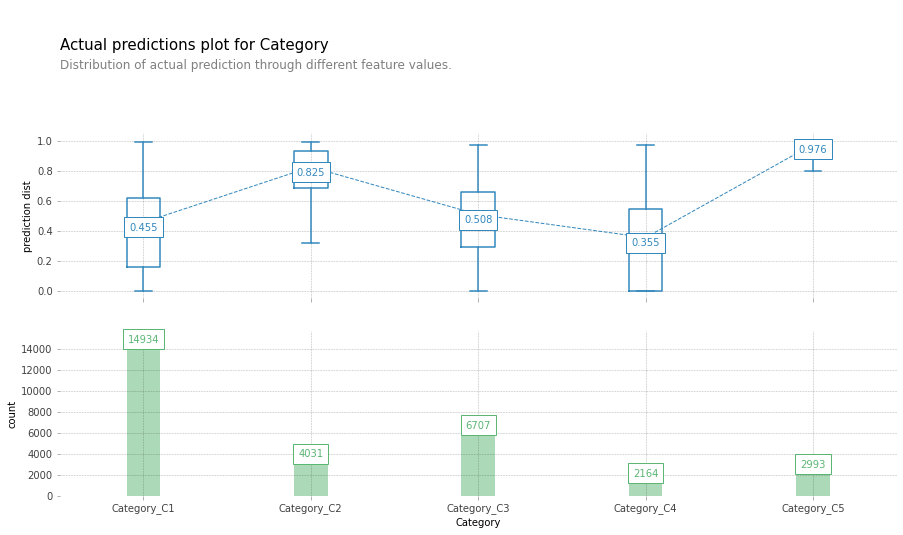

In [ ]:
X=df_new2.drop(['Purchased_ABC_product'],axis=1)
y=df_new2['Purchased_ABC_product']
xg=XGBClassifier()
xg.fit(X,y)
fig, axes, summary_df = info_plots.actual_plot(
    model=xg, X=X, feature=['Category_C1','Category_C2','Category_C3','Category_C4',
                            'Category_C5'], feature_name='Category'
)

# Numerical Features with respect to Dependent Variable

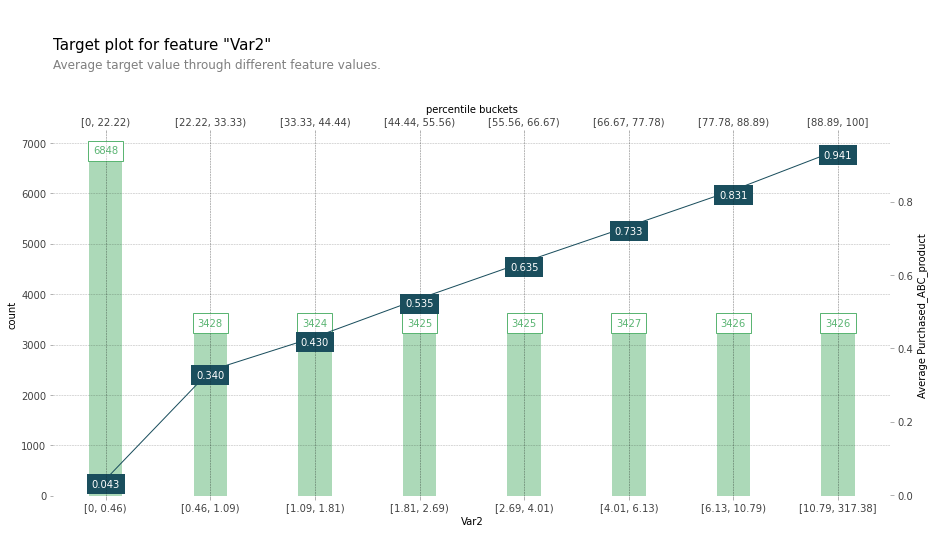

In [ ]:
fig, axes, summary_df = info_plots.target_plot(
    df=df_new, feature='Var2', feature_name='Var2', target='Purchased_ABC_product', show_percentile=True
)

# PDP plot

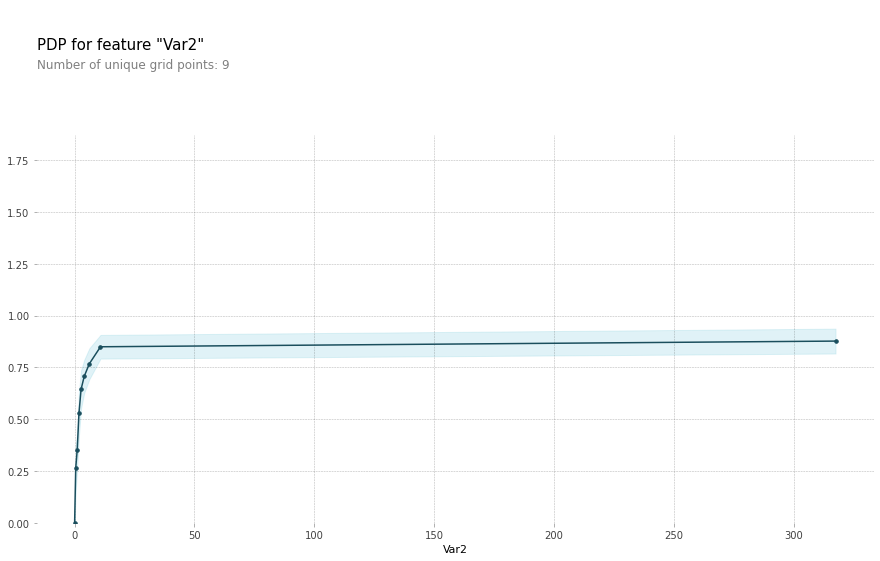

In [ ]:
pdp_weekofyear = pdp.pdp_isolate(
    model=xg, dataset=df_new2, model_features=X.columns, feature='Var2'
)
fig, axes = pdp.pdp_plot(pdp_weekofyear, 'Var2')

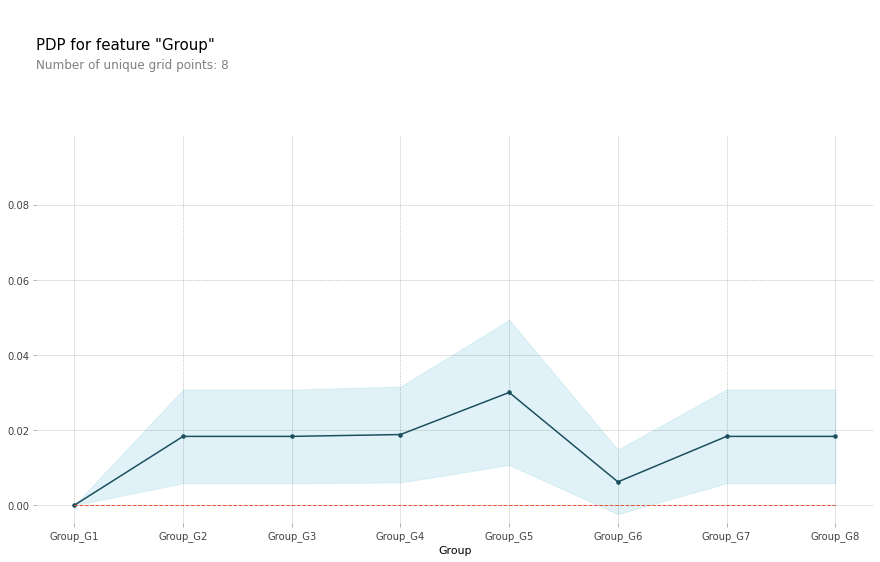

In [ ]:
pdp_weekofyear = pdp.pdp_isolate(
    model=xg, dataset=df_new2, model_features=X.columns, feature=['Group_G1','Group_G2','Group_G3','Group_G4',
                            'Group_G5','Group_G6','Group_G7','Group_G8']
)
fig, axes = pdp.pdp_plot(pdp_weekofyear, 'Group')

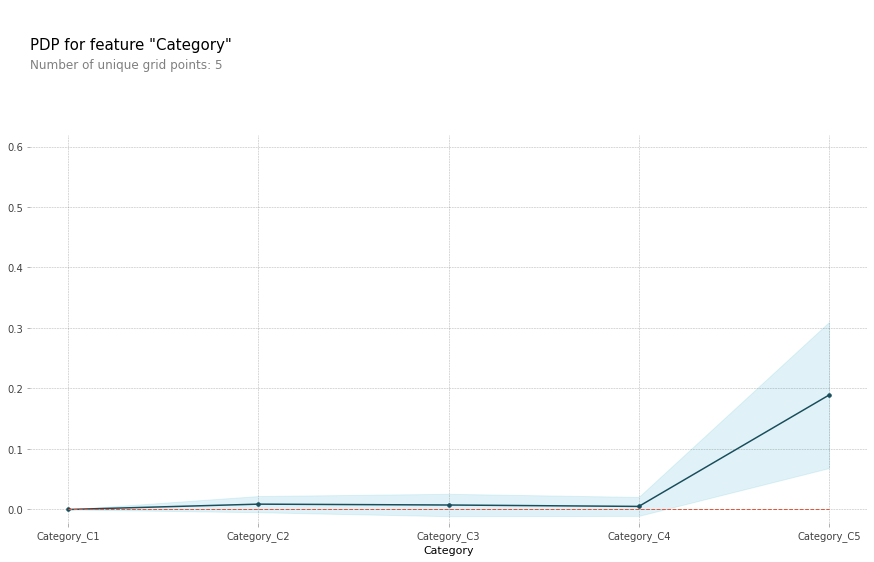

In [ ]:
pdp_weekofyear = pdp.pdp_isolate(
    model=xg, dataset=df_new2, model_features=X.columns, feature=['Category_C1','Category_C2','Category_C3','Category_C4',
                            'Category_C5']
)
fig, axes = pdp.pdp_plot(pdp_weekofyear, 'Category')

#Two independent feature interactions with respect to Dependent Feature

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


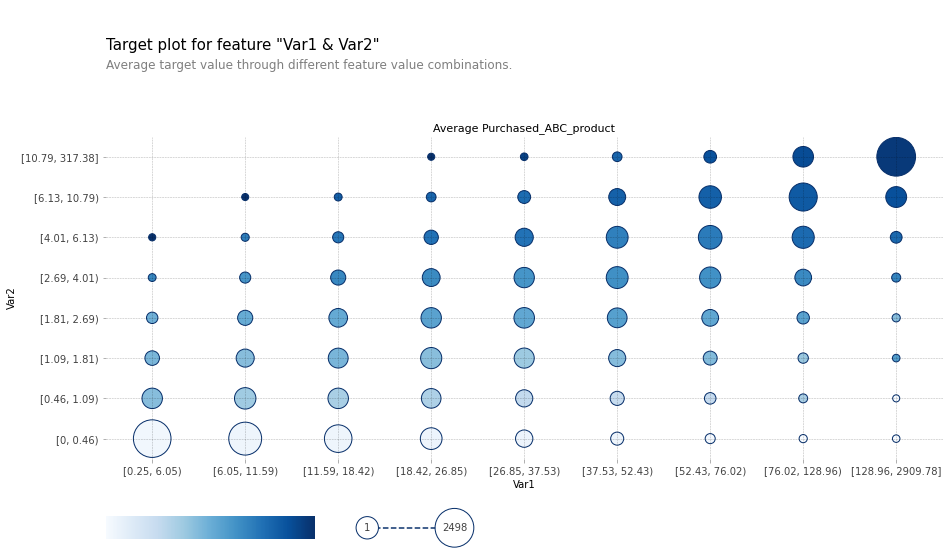

In [ ]:
fig, axes, summary_df = info_plots.target_plot_interact(
    df=df_new2, features=['Var1', 'Var2'], feature_names=['Var1', 'Var2'], target='Purchased_ABC_product'
)


In [ ]:
from xgboost import XGBClassifier
X=df_new2.drop(['Purchased_ABC_product'],axis=1)
y=df_new2['Purchased_ABC_product']
xg=XGBClassifier()
xg.fit(X,y)
inter1 = pdp.pdp_interact(
    model=xg, dataset=df_new2, model_features=X.columns, features=['Var1','Var2']
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


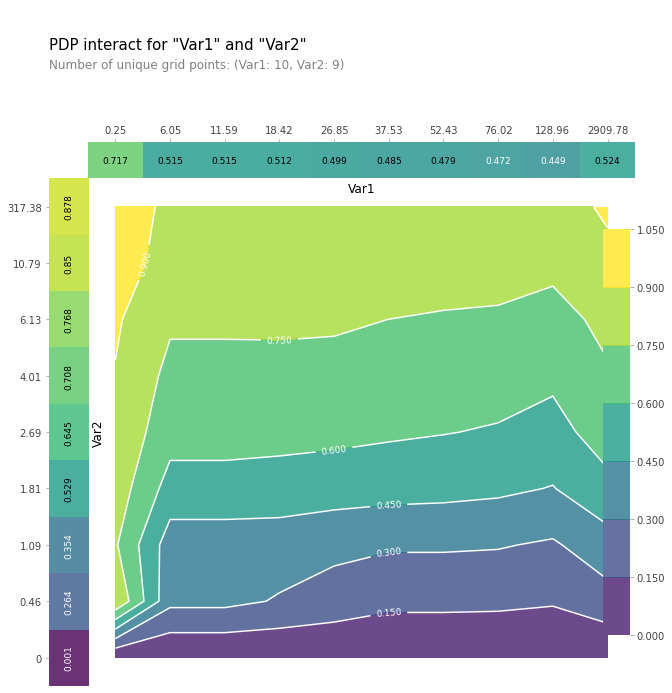

In [ ]:
fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=inter1, feature_names=['Var1', 'Var2'], plot_type='contour', x_quantile=True, plot_pdp=True
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


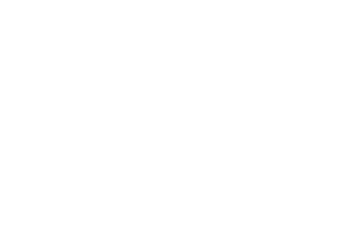

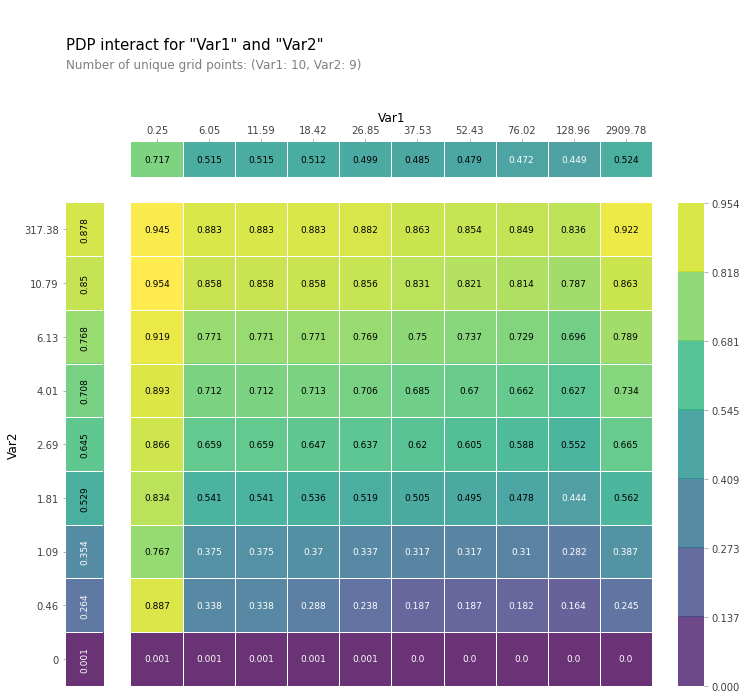

In [ ]:
plt.axis('off')
fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=inter1, feature_names=['Var1', 'Var2'], plot_type='grid', x_quantile=True, plot_pdp=True
)

In [ ]:
!pip3 install mpld3
import mpld3


In [ ]:
file= open("index","w")
html_str = mpld3.save_json(fig,file)
file.close()

In [ ]:
html_str = mpld3.fig_to_html(fig,no_extras=True)
Html_file= open("heatmap.html","w")
Html_file.write(html_str)
Html_file.close()

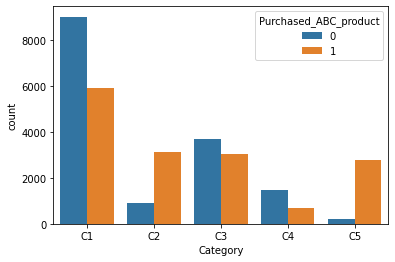

In [ ]:
plt.figure()
sns_plot=sns.countplot(df['Category'],hue=df['Purchased_ABC_product'])
fig = sns_plot.get_figure()

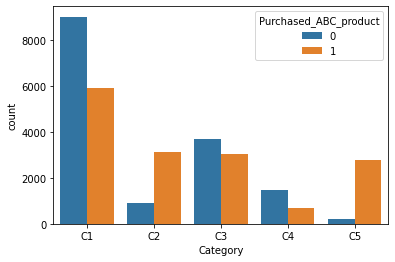

In [ ]:
fig

In [ ]:
html_str = mpld3.fig_to_html(fig,no_extras=True)
Html_file= open("index2.html","w")
Html_file.write(html_str)
Html_file.close()

In [ ]:
df_new.corr()

,Var1,Var2,Purchased_ABC_product,Group_G2,Group_G3,Group_G4,Group_G5,Group_G6,Group_G7,Group_G8,Category_C2,Category_C3,Category_C4,Category_C5,Rating_Gold,Rating_Silver
Var1,1.000000,0.878002,0.316515,-0.022897,0.481711,-0.014792,-0.060626,-0.017534,-0.002393,-0.010941,0.397799,-0.132698,-0.125265,0.302241,0.580258,-0.070957
Var2,0.878002,1.000000,0.350131,-0.012817,0.395290,-0.005970,-0.029379,-0.018006,0.012569,-0.008450,0.304054,-0.108612,-0.103894,0.326376,0.514276,-0.058658
Purchased_ABC_product,0.316515,0.350131,1.000000,-0.034519,0.165655,-0.010723,0.003854,-0.014330,0.003544,-0.011940,0.213445,-0.054299,-0.105561,0.276940,0.324612,0.094292
Group_G2,-0.022897,-0.012817,-0.034519,1.000000,-0.024324,-0.012608,-0.061243,-0.009990,-0.002579,-0.002453,-0.029467,-0.012721,0.140259,-0.013360,-0.020274,-0.017850
Group_G3,0.481711,0.395290,0.165655,-0.024324,1.000000,-0.031419,-0.152623,-0.024895,-0.006428,-0.006114,0.209978,-0.067170,-0.056709,0.196776,0.373601,-0.104406
Group_G4,-0.014792,-0.005970,-0.010723,-0.012608,-0.031419,1.000000,-0.079106,-0.012903,-0.003332,-0.003169,-0.014246,0.005966,-0.005739,-0.007817,-0.025333,-0.010427
Group_G5,-0.060626,-0.029379,0.003854,-0.061243,-0.152623,-0.079106,1.000000,-0.062679,-0.016184,-0.015394,-0.064669,-0.031221,0.189478,-0.033724,-0.130897,-0.099278
Group_G6,-0.017534,-0.018006,-0.014330,-0.009990,-0.024895,-0.012903,-0.062679,1.000000,-0.002640,-0.002511,-0.010377,0.008737,-0.007485,-0.015642,-0.029541,0.013142
Group_G7,-0.002393,0.012569,0.003544,-0.002579,-0.006428,-0.003332,-0.016184,-0.002640,1.000000,-0.000648,-0.006438,0.004313,-0.007173,0.016634,0.000753,-0.007743
Group_G8,-0.010941,-0.008450,-0.011940,-0.002453,-0.006114,-0.003169,-0.015394,-0.002511,-0.000648,1.000000,-0.009631,0.009081,0.044337,-0.008143,-0.011612,-0.017425


# Plotly

In [ ]:
import plotly.express as px



fig = px.imshow(df_new.corr(), text_auto=True)
fig.show()

In [ ]:
fig.write_html("file.html")

In [ ]:
import plotly.graph_objects as go
list_sum=sum(list(feat_dict.values()))
measure=["relative"]*len(list(feat_dict.values()))
measure.append('total')
text=[str(x)+'%' for x in list(feat_dict.values())]
text.append('{}%'.format(list_sum))
x=list(feat_dict.keys())
x.append('Net')
y=list(feat_dict.values())
y.append(list_sum)
fig = go.Figure(go.Waterfall(
    name = "20", orientation = "v",
    x = x,
     measure = measure,
    textposition = "outside",
    y = list(feat_dict.values()),text =text,
    connector = {"line":{"color":"rgb(63, 1000, 63)"},
                 "bar":{"color":"rgb(63, 1000, 63)"}},
))

fig.update_layout(
        title = "Relative Feature Importance",
        showlegend = False
)

fig.show()

ValueError: ignored

In [ ]:
text

['28.0%',
 '23.3%',
 '21.0%',
 '11.5%',
 '9.0%',
 '3.8%',
 '1.8%',
 '0.9%',
 '0.5%',
 '0.2%',
 '100.0%']

In [ ]:
val=[str(x)+'%' for x in list(feat_dict.values())]
val.append('{}%'.format(sum(list(feat_dict.values()))))
val

['28.0%',
 '23.3%',
 '21.0%',
 '11.5%',
 '9.0%',
 '3.8%',
 '1.8%',
 '0.9%',
 '0.5%',
 '0.2%',
 '100.0%']

In [ ]:
measure=["relative"]*len(list(feat_dict.values()))
measure.append('total')
measure

['relative',
 'relative',
 'relative',
 'relative',
 'relative',
 'relative',
 'relative',
 'relative',
 'relative',
 'relative',
 'total']